# Genre Classification of TV Shows

**Submission deadline: Friday 26 May, 11:55pm**

**Assessment weight: 25% of the total unit assessment.**

*Unless a Special Consideration request has been submitted and approved, a 5% penalty (of the total possible mark of the task) will be applied for each day a written report or presentation assessment is not submitted, up until the 7th day (including weekends). After the 7th day, a grade of ‘0’ will be awarded even if the assessment is submitted. The submission time for all uploaded assessments is **11:55 pm**. A 1-hour grace period will be provided to students who experience a technical concern. For any late submission of time-sensitive tasks, such as scheduled tests/exams, performance assessments/presentations, and/or scheduled practical assessments/labs, please apply for [Special Consideration](https://students.mq.edu.au/study/assessment-exams/special-consideration).*

In this assignment you will complete tasks for an end-to-end genre classification application. We will train and test the data using the TVmaze data set.

TVmaze is a free online television information database that provides users with detailed information about TV shows, their episodes, and their schedules. The website was launched in 2005 and has since grown to become one of the most comprehensive TV databases available.

### Genre

To reduce opportunities for copying and cheating, you will given a mostly-unique genre to work with. Add it to the next cell. Email Abid (or ask him when you see him) for your preference; if too many people have chosen that genre, he might ask you to pick again.

Possibilities are:

- Drama

- Comedy

- Romance

- Crime

- Action

- Adventure

- Anime

- Mystery

- History

- Children

- Thriller

- Fantasy

- Science-Fiction

- Family

- Food

- Music

- Travel

- Sports

- Nature

In [1]:
assigned_genre = "History"

To make sure everyone has unique data (even if you share a genre), several questions will ask you
to initialize a random number generator with `random_state_key`. Pick some number that is likely
to be unique to you (e.g. the digits from your student number).

In [2]:
# Replace 12345 with the digits from your student number, or some other number that is likely to be unique.
random_state_key = 45999864

### Data

You will find a SQLite database (called `tvmaze.sqlite`) on iLearn. This is the data you will work from. Copy it into the same directory where you have put this jupyter notebook.

The following cell should create a connection for you.

In [3]:
import sqlite3

# Connect to the SQLite database
connection = sqlite3.connect("tvmaze.sqlite")

### Character Data

In a few places, you will be asked to run queries on the names of characters.

The following cell creates a dataframe called `characters_df` using this query:

`select tvmaze_id, tvmaze_character_id, name from tvmaze_casting join tvmaze_characters using (tvmaze_character_id);`

In [4]:
import pandas as pd

# Define the SQL query
sql_query = """
select tvmaze_id, tvmaze_character_id, name
from tvmaze_casting join tvmaze_characters
using (tvmaze_character_id);
"""

# Read the data into a pandas dataframe
characters_df = pd.read_sql_query(sql_query, connection)

If you aren't familiar with pandas, and just want to use raw `numpy`, you can use the `characters` array
created in the next cell.

In [5]:
characters = characters_df.to_numpy()
characters.shape, characters.dtype

((209697, 3), dtype('O'))

And to make it a little easier, here are the character names extracted as a list.

In [6]:
character_names = list(characters[:,2])
character_names

['You Yuan Le',
 'Lin An An',
 'Ren Hao',
 'Ye Luo Sha',
 'Sung Yi Gyum',
 'Hong Da In',
 'Sung Yi Bum',
 'Park Chun Sam',
 'Mio Meguro',
 'Iwa Yotsuya',
 'Ryo Sakai',
 'Utako Warabe',
 'Miyuki Yamanaka',
 'Sara Yanagi',
 'Yuzuru Minaoka',
 'Hibito Harashima',
 'Hiyo Numata',
 'Sgt. Bill Parkin (Sarge)',
 'PC Eric Warren (Token)',
 'PC John Barrett (Thug)',
 'PC Gill Copson (Dippy)',
 'PC Roger Tennant (Flub)',
 'PC Lionel Adams (Oz)',
 'PC Susan Li (Bruce)',
 'PC Ian Macrae (Jock)',
 'PC Wayne Cheetham (Bog)',
 'Supt. Hallsworth',
 'DI Overton',
 'DCI Chivers',
 'PC Goole',
 'DC Stoppard',
 'Tracy Collins',
 'Linda Eide',
 'Robert Kingsford',
 'Dr. Christine Fletcher',
 'Dr. Mike Gregson',
 'Dr. Louise Macken',
 'Dr. Stuart Phelan',
 'Dr. David Scobie',
 'Cathy Jordan',
 'Judy Enshaw',
 'Terry Harker',
 'Yvonne Silver',
 'Dr. Andrew Argyle',
 'Dr. Kate Brady',
 'Samantha Docherty',
 'Jack Turner',
 'Dr. Raz Amin',
 'Dr. Ruth Cole',
 'Dr. Danny Barton',
 'Poppy Jonston',
 'Dr. Jeffrey 

### Show data

You might want to start with 200 shows so that your program runs faster, and then later on replace it with
500, or 1000 if you need more data.

In [7]:
data_size = 2000

The following cells create:

- A dataframe called `show_df` (if you are familiar with pandas)

- A numpy array called `shownames` (the names of the shows to work with)

- A numpy array called `descriptions` (which has the show descriptions)

- A numpy array called `in_genre` (whether this show is in your target genre or not)

- A numpy array called `tvmaze_ids` (the ID numbers of the shows).

In [8]:
out_of_genre_sql_query = f"""
select tvmaze_id, showname, description, 0.0 as in_genre from tvmaze
where tvmaze_id not in (select tvmaze_id from tvmaze_genre where genre = '{assigned_genre}')
      and description is not null
      and length(description) > 10"""

in_genre_sql_query = f"""select tvmaze_id, showname, description, 1.0 as in_genre from tvmaze
where tvmaze_id in (select tvmaze_id from tvmaze_genre where genre = '{assigned_genre}')
      and description is not null
      and length(description) > 10
"""

out_of_genre_df = pd.read_sql(out_of_genre_sql_query, connection)
in_genre_df = pd.read_sql(in_genre_sql_query, connection)
show_df = pd.concat([out_of_genre_df.sample(data_size, random_state=random_state_key), 
                     in_genre_df.sample(data_size, random_state=random_state_key)])
show_df

,tvmaze_id,showname,description,in_genre
44488,55444,Élite Historias Breves: Carla Samuel,"<p>Samuel attempts a big, romantic gesture at ...",0.0
37030,45689,Истории про Фину,<p>An example of the best Russian animation of...,0.0
47992,60231,Military Prosecutor Doberman,<p>Do Bae Man became military prosecutor only ...,0.0
52550,65961,Ponds Theater,"<p>One-hour live plays, ranging from comedy to...",0.0
17752,21365,Strange Trips,"<p>Somewhere near the corner of ""never been th...",0.0
...,...,...,...,...
558,17136,Andere Tijden Sport,<p><b>Andere Tijden Sport</b> expose the histo...,1.0
851,24310,"Harlots, Housewives and Heroines: A 17th Centu...",<p>Historian Dr. Lucy Worsley immerses herself...,1.0
1419,36789,The Spanish Princess,"<p><b>The Spanish Princess</b>, the latest cha...",1.0
434,13817,Resilient Cities,<p><b>Resilient Cities</b> is a five-part docu...,1.0


In [9]:
show_ids = show_df.tvmaze_id.to_numpy()
descriptions = show_df.description.to_numpy()
in_genre = show_df.in_genre.to_numpy()
shownames = show_df.showname.to_numpy()

## Task 1 (3 marks) - Regular expressions

### 1.1 (1 mark)

We all know that James Bond gets his gadgets from Q. Are there other shows where a character has a 
one-letter name?

Write a regular expression that matches a single upper-case letter, and use it to check against
the characters in `character_names`.

How many shows do you find?

In [10]:
import re
single_letter_character = re.compile('^[A-Z]$')
count = 0
for name in character_names:
    match = single_letter_character.search(name)
    if match is not None:
        count+=1
        print(match)

<re.Match object; span=(0, 1), match='R'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='Q'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='Q'>
<re.Match object; span=(0, 1), match='K'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='K'>
<re.Match object; span=(0, 1), match='K'>
<re.Match object; span=(0, 1), match='L'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='Y'>
<re.Match object; span=(0, 1), match='G'>
<re.Match object; span=(0, 1), match='A'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='Z'>
<re.Match object; span=(0, 1), match='K'>
<re.Match object; span=(0, 1), match='X'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='D'>
<re.Match object; span=(0, 1), match='L'>
<re.Match object; span=(0, 1), mat

In [11]:
print(count)

47


### Explanation
There were 47 shows found where a character has a one-letter name.

The code loops through each character name and checks it against `re.compile('^[A-Z]$')` which checks if the string starts and ends with any capital letter in the English alphabet and then. It prints the character's name if there is a match

### 1.2 (1 mark)

Write a regular expression that finds medical doctors. A medical doctor might be "Dr." or "Doctor" or "Dr".

Watch out for:

- JUDr. Augusta (who has a PhD in law)

- MUDr. Sova (who is a doctor)

- The Doctor (a science fiction character, who isn't a medical doctor)

- The Sixth Doctor (the same science fiction character, there are fifteen of them)

Assume that Dr. Death and Dr. Teeth are doctors.

In [12]:
doctors = re.compile('^(?!JUDr\. Augusta|MUDr\. Sova|The Doctor|The Sixth Doctor).*?(Dr\.|Doctor|Dr\s)') # .*? needed because of ^. Some characters don't start
                                                                                                         # with Dr but are have it later on in their name
for name in character_names:
    match = doctors.search(name)
    if match is not None:
        print(name)

Dr. Christine Fletcher
Dr. Mike Gregson
Dr. Louise Macken
Dr. Stuart Phelan
Dr. David Scobie
Dr. Andrew Argyle
Dr. Kate Brady
Dr. Raz Amin
Dr. Ruth Cole
Dr. Danny Barton
Dr. Jeffrey Drummond
Dr. Saskia Walker
Dr. James Da Costa
Flight Lieutenant Dr. Susan Young
Dr. Sado
Dr Symonds
Dr. "Uncle Bill" Wilson
Dr. Thomas 'Tommy' Ramsey
Dr. Chahat Baig
Dr. Trish Collings
Dr. Cliff Wainwright
Dr. Alfred Nash
Dr. Paul Featherstone
Dr. Cathy Harding
Dr. Daniel Laing
Dr. Candy
Dr. Edgar Pascoe
Dr. Lileth Pascoe
Dr. Sam Bliss
Dr. Melanie Kilpatrick
Dr. Sandra Lee
Doctor Hamilton
Dr. Robert Cook
Dr. Carol Lang
Dr. Wendelin Winter
Dr Anand Chakravarthy
Dr. Sandra Lee
Dr. Green
Dr. Michael "Skip" Henai
Dr. Catherine Benson
Dr. Petch
Dr. Perth
Dr. Cintron Morris
Dr. Samuel Finnix
Dr Lara Dungan
Dr. Chris van Tulleken
Dr. Xand van Tulleken
MVDr. Toman
Dr. Chris Ellison
Dr. Mike Whiteford
Dr. Scarecrow
Dr. Charles Procter
Dr. Ramadan Hussein
Dr. Myrra Rhodes / Medusa
Dr. Yoshinaga
Dr. Isaac "Ike" Hersch

Oberstabsarzt Dr. Sabine Petersen
Stabsarzt Dr. Maren Maibach
Stabsarzt Dr. Ilona Müller
Dr. Max Henning
Dr. Eva Grünberg
Notarzt Dr. Philipp Haase
Oberärztin in der Notaufnahme Dr. Jasmin Jonas
Dr. Peter Fried
Dr. Michael Niederbühl
Dr. Roland Heilmann
Dr. Xavier
BKA-Chef Dr. Johannes Ried
Dr. Helene Sturbeck
Dr. Renz
Dr. Franck
Dr. Lessing
Dr. Voss
Leslie Dr. Death Crunchner
Dr. Tom Gilder
Dr. Arthur Gilder
Dr. Michelle Oakley
Dr. Pimenta
Dr. Grant "Doc" Roberts
Dr. George Dunbar
Dr. Donna Chen
Dr. Beckand
Doctora Marta Romero
MUDr. Blažej
MUDr. Štrosmajer
MUDr. Králová
MUDr. Čeňková
MUDr. Blažej
MUDr. Čeňková
Dr. Machovcová
Dr. Naďa Šulcová
Dr. Řehoř (Gregory)
Dr. Dana Králová
Dr. Cvach
Dr. Karel Sova
JUDr. Vojíř ml.
Dr. Hynek Klobouk
Dr. Machovec
Dr. Bill Baxter
Dr. Christopher Priestley
Dr. Nora Campbell
Dr. Matt Slingerland
Dr. Rae Brennan
Dr. Neo
Dr. Ken Brickman
Dr. Gregory Ruval
Dr. Daniel Koch
Dr. Vera Bergmann
Dr. Thomas Renner
Dr. Frederick Peyn
Dr. Carolin Moritz
Dr. Phili

Dr. Parker
Dr. Jimmi Clay
Dr. Al Haskey
Dr. Daniel Granger
Dr. Zara Carmichael
Dr Niamh Donoghue
Dr. Emma Reid
Dr. Sid Vere
Dr. Jas Khella
Dr. Tim Finch
Dr. Robert Jekyll
Dr. Vishal Najaran
Dr. Mark Sloan
Dr. Amanda Bentley
Dr. Jesse Travis
Dr. Jack Stewart
Dr. Marcus Summer
Dr. Malcolm Donahue
Dr. Anthony Carmichael
Dr. Kristin Westphalen
Dr. Wendy Smith
Kermit the Frog / Rowlf / Waldorf / The Swedish Chef / Dr. Teeth / Link Hogthrob
Gonzo / Dr. Bunsen Honeydew / Zoot
Dr. Frost
Dr. Porter
Dr. John H. Watson
Dr. John H. Watson
Dr. Laura Hobson
Dr. Mark Boyer
Dr. Gene Pfeiffer
Dr. Doug Graham
Dr. Owen Maestro / Rob Huebel
Dr. Blake Downs / Cutter Spindell / Rory Spindell
Dr. Glenn Richie / Just Falcon
Dr. Lola Spratt / Lynn Williams
Dr. Cat Black / Dixie Peters
Dr. Valerie Flame / Ingrid Hagerstown
Dr. Natasha Collins
Dr. Matt Harmon
Dr. Alexandra "Alex" Panttiere
Dr. Pierce Harrison
Dr. Jessie Shane
Dr. Casey Callahan
Dr. Myron Hackett
Dr. Anne Macy
Dr. Fiona McKenzie
Doctor Foggerty
D

Dr. Johann Pryce
Dr. Norman Godfrey
Dr. David Harvard
Dr. Oliver Thredson
Dr. Arthur Arden
Dr. Rudy Vincent
Dr. Elias Cunningham / Actor William Van Henderson
Dr. Max Bergman
Dr. Noelani Cunha
Dr. Rachel Scott
Dr. Quincy Tophet
Dr. Ephraim Goodweather
Dr. Nora Martinez
Dr. Victor Frankenstein
Dr. Seward
Dr. Harrison "Harry" Wells / Earth-2
Dr. Harrison Wells
Dr. Harrison Nash Wells
Dr. Leslie Thompkins
Dr. Daniel Nash
Dr. Kate Millar
Dr. 'Shug' Nevin
Dr. Karen Smith
Dr. Angus Harvey
Dr. Martine Nichol
Dr. Emilia
Dr. Stuart Rosenfeld
Dr. Carina DeLuca
Dr. Jonathan Fowler
Dr. Soames
Dr. Cormac Hayes
Dr. Winston Ndugu
Doctor Lin
Dr. Howard
Dr. Helen Lawal
Dr. Tessa Hartmann
Doctor Cruces
Dr. Litman
Dr. Paul Bunion
Doctor Bell
Dr. Jumba Jookiba
Dr. Jacques von Hämsterviel
Dr. Ji-Yoon Kim
Dr. Bruce Ivins
Dr. Ella Wendt
Dr. Ingeborg Rapoport
Prof. Dr. Otto Prokop
Prof. Dr. Helmut Kraatz
Dr. Alexander Nowack
Dr. Curt Bruncken
Dr. Edward Parker
Dr. Men
Dr. M
Dr. Scott Butler, MD
Dr. Adam O'Nei

### Explanation
The code above is used to loop through character names and prints the name of doctors only.

`(Dr\.|Doctor|Dr\s)` checks if there is a "Dr.", "Doctor" or "Dr " in the character's name. 

`^(?!JUDr\. Augusta|MUDr\. Sova|The Doctor|The Sixth Doctor).*?` is used to ignore the specific names as specificed by the question itself. `?!` is a negative lookahead and when combined with `^`, it means that the character's name can't start with the names specified in the question.

`.*?` is used because of `^`. It means that the character's name must have but not need to start with "Dr.", "Doctor" or "Dr " to be printed.

### 1.3 (1 mark)

Write a regular expression to find Cyrillic alphabet character names.

In [13]:
cyrillic = re.compile('[\u0400-\u04FF]')

for name in character_names:
    match = cyrillic.search(name)
    if match is not None:
        print(name)

Ирина
Геннадий
Наталья Ивановна
Даня Крастер
Ведущий
Ведущий
Иван Лукашин
Евдоким Подрезов
Анфиса Петровна Минина
Лизавета Пряслина
Варвара Иняхина
Евсей Мошкин
Михаил Пряслин
Егорша
Настя Семёнова
Сабина Сабурова
Игорь Бельский
Олег Николаевич Веселовски
Лариса
Сергей Сабуров
Влад
Николай Ставрогин
Петр Верховенский
Павел Дмитриевич Горемыкин
Иван Львович Флибустьеров
Иван Шатов
Алексей Кириллов
Даша Шатова
Лиза Тушина
Варвара Петровна Ставрогина
Степан Трофимович Верховенский
Игнат Лебядкин
Марья Тимофеевна Лебядкина
Андрей Антонович
Юлия Михайловна
Мария Игнатьевна Шатова
Федька-каторжный
Тихон
Иосиф Виссарионович Сталин
Клавдия Плавникова
Валентина Седова
Анатолий Седов
Константин Семенов
Ромодановский
Молотов
Фаина Георгиевна Раневская
Павел Шпрингфельд
Мария Гаврилова
Андрей Краснов
Корнелия Кравчик (лже-Ванда)
Станислав Бонн
Игорь Валерьевич Любецкий
Ольга Василевская
Алексей
Артём Ткаченко
Маргарита Сметанина
Виктор Батников
Татьяна Козлова
Николай
Полина
Васька Макаров
отец Ни

Инна
студент
Валерик
Анна Романовна
Нюра
Иван Адамыч
Валерик
гостья на свадьбе
Иван Петрович Черкасов
Соня Тимофеева
Анвар Каримов
Заррина
Николай, зоотехник зоопарка
Сулейман Мирзоевич
Карим, шофёр, друг Анвара
девушка-гид
Хасанов, таксидермист
Муразов, шофёр
Настя, невеста Николая
Владимир Павлович Зуев, старший зоотехник зоопарка
киоскёр
учитель
эпизод
Сафар
Ута
Андро
Надиде
Боцо
Ашордия
Селим
моряк
генерал
английский офицер
Хасан
Дульсинея
Луис е Карраскиль
Санчо Панса
мать Альдонсы
отец Альдонсы
сеньора Тереса
жених Альдонсы
Санчика
первый поклонник
второй поклонник
донья Марта
дон Фелипе
Пастрана
донья Лусия
дон Гомес
донья Инес
капитан Урбина
племянник Урбины, поручик
дон Антоньо
начальник стражи
танцующий дворянин
гость дона Гомеса
нищий
дама
пионер
пионер
пионер
мадам Саламандра, капитанша, предводительница пиратов
Толстяк, старший группы
Мечтатель
Шустрый
помощник Капитанши пиратов, артист Юра
Волшебник, Юрий Николаевич
эпизод
Ирина Короткова
Святослав Рюрикович, кинорежиссер

Тамара Сажина, жена следователя
Крахмальников, следователь
Владимир Данилин, фокусник
Павел Фёдорович, гардеробщик
эпизод
Лена, супруга и партнер фокусника Данилина
эпизод
Петер Лобенштейн
Энгельхен
Маурах
Науманн
Шрауденбах
Вильгельми
Борниг
Биргит
Мейер
фрау Мюлленс
фрау Йоргенсон
Йоргенсен
Брюдигам
Даммер
Кентон
Миленс
портье
эпизод
эпизод
эпизод
эпизод
эпизод
эпизод
Анна Фирлинг - мамаша Кураж
повар
полковой священник
Иветта
Катрин
Элиф Майоки
Фиш
от автора / трубач
от автора / скрипач
вербовщик
фельдфебель
крестьянка
крестьянин
молодой крестьянин
шведский командующий
солдат
эпизод
Одноглазый
пастор
солдат
разбойник
Ксения Борисовна Барышева
Сергей Петрович Грачёв
Борис Иванович Харченко
тетя Лена
Катя Лазаренко
Люба, дочь Ксении Барышевой
Василий, Валет
Дима Грачёв, брат Сергея
Лев Лукич Ушанов
Олег Николаевич Школьников, директор совхоза
Семён Иванович Хомяков
Пётр Грачёв, отец Грачёвых
Алька
Дмитрий Васильевич Рыжов, председатель райисполкома
Владимир Михайлович Гуменной, агроно

Катя
Поля
Федор Терентьевич Горбяков
Федот Федотович
Епифан Криворуков
Анфиса Криворукова
Никифор
Варсонофий Квинтельяныч Филатов, урядник
Вонифатий
Глафира
Неонила Терентьевна
Александр Ксенофонтов
тетя Стася
Феофан Парокопытов
фрау Бауэр
Осиповский
Насимович
Карпухин
Маша
Степан Димитрич Лукьянов
Татьяна Никаноровна
Прохоров
Степанида Семеновна (Мамика)
Зинаида
Тимофей Чернов
Петька Скобелкин
Домна
Василий Демьянович Шустов
Агафон
Агей
Агап
Окентий Свободный
Ефим
первый жандармский полковник
второй жандармский полковник
эпизод
полковник
официант
мать больного ребенка
Силантий
Аксинья
Лука
Филимон Селезнев, староста
Евлампий Ермилыч
кулак
острослов
ямщик
Григорий Елизаров
Затунайская
Ефим Власов
Ермолай Лопаткин
Марфа
жандарм
становой нарымский пристав
Егорша, тунгус
Егорыч, кусковский мужик
поручик
священник в поезде
штабс-капитан
гость
кусковский мужик
эпизод
Андрей Дмитриевич Дорохов, старший следователь Уголовного розыска, майор
лейтенант милиции Матушкин
Антон Георгиевич Белов, п

бандит
шофёр
Вацлав Калиновский
Мирзо
Рустам-Бек
Эльмурад
Кобрин
Али
Саид-охотник
Мадина
Юсуф-бек
Даврон
Бобо-Нияз
арестант
Гафур арестант
эпизод
Джамалутдин
басмач
басмач
басмач Мирвахид
крестьянин
Содиков начальник штаба гарнизона
Айгуль
Мурад
Аман
купец Мамед
Курбан
злой Дэв
добрый Дэв
Гюльджемал
Еламан
Карамерген
Керим
Караванбаши
торговка
торговец
Галина Владимировна Кадетова
Александр Георгиевич Гололобов
Георгий Терентьевич Гололобов, отец Шуры, пенсионер, бывший врач-логопед
Груздев
Артамонов, бывший муж Кадетовой
Инна, администратор
Тулин, кинорежиссер
водитель КАМАЗа
Леонид Иванович Мартыненко, главный режиссёр областного театра
Нина Александровна, мать Галины
Надя
сестра Галины
Виталий
Коротьков, сотрудник телефонного узла
гостья из Грибова
Евдокимов, лейтенант, инспектор ГАИ
Павел, земляк из Грибова
Александр Сергеевич, композитор
почтальон из Грибова
"Рыжик"
таксист
Валентина
министр обрзования
Стручкова
железнодорожница
Евгения Ивановна, секретарша
проводница
пассажирка
К

Атос
Арамис
Портос
кардинал Мазарини
королева Анна
герцогиня де Шеврез
виконт Рауль де Бражелон
юный Людовик
Рошфор
Лященко
Игорь Сивко
Людмила
Николаевич
бухгалтер
Аралов
Денис
Федор Павлович
мать Лященко
Светлана
Черняева
Артеменко
Касьяненко
член правления колхоза
Фонарикова
эпизод
эпизод
эпизод
Хомченко Михаил Степанович, бригадир бригады № 208
Надя
Нефедов
Иван Ковтун
Лютиков
Симагин
Люся
Полина Матвеевна
дядя Митя
Тамара
Кузин
начальник порта
Марк Талалин, сварщик
Илья Семёнович Беседин, бригадир
Пётр Константинович Смайдов, парторг
Марина Санина
Людмила Краснова, сварщица
Харитон Езерский, член бригады Беседина
Клим Думин, член бригады Беседина
Костя Байкин
Дима Баклан, член бригады Беседина
Андреевич (Закостеневский), член бригады Беседина
Саня Кердыш, крановщик
Василий Степанович Борисов, начальник отдела кадров
Сергей Сотников
Назарова
Кубатко
Григорьева
Карапетян
Семенов
Очигава
Алиса
Красноголовый
Бумбараш
Гаврила
Варвара
Лёвка Демченко
Яшка
Софья Николаевна Тульчинская, ат

Караев
мать Насти
Любанский
Топорков
Лисянский
Надежда Петровна
Нина, подпольщица
Надежда Арсеньева (Динка)
Ленька
Мышка
Марина Арсеньева
Костя
Гордей Лукич / полицейский
Меркурий
Лиза
шарманщик
Петрович
Александр Дмитриевич Арсеньев
Полина Крачковская
Ленин
Феликс Дзержинский
Яков Свердлов
Сидней Рейли
эсер Лазарев
Антонов-Овсеенко
Борис Савинков
Лацис
Менжинский
консул Локкарт
Николай Осинцев
Зубарев
Александр Трегубов
Разгонов
Анатолий Киреев
Адамс Хадсон
Терентьев
Захар Шульгин
Сысоева
Вера
Дата Туташхиа
Мушни Зарандиа
граф Сегеди
Архип Сетури
Коста Дастуридзе
Нано
Тико Орбелиани
Коста Зарандия
Антон Соболев
Лена Назарова
Элеонора
Альфредо Гратиотти
Рино Феличе, итальянский журналист
Михаил Иванович Мохов
Вика
Клавдия Ивановна Дондукова
Максим Матвеевич Строгов
Анастасия Федоровна Строгова
Артем Матвеевич Строгов
Марина Матвеевна Строгова
Михаил Семенович Лисицын
Марей Гордеевич Добролетов
Захар Николаевич Великанов
Андрей Калистратович
Иван Фёдорович Ефремов
Семен Васильевич Грибк

Марьяна Александровна Трофимова, финансист
Олесь Петрович Зубок, кассир
Адина Львовна Тарская, владелица "Юниум-Банка"
Вадим Иванович Лактаев, следователь
Иван Алексеевич Ильин, управляющий банка
Николай Олегович Мальцев, начальник СБ банка
Игорь Исаевич Мирзоев, начальник кредитного отдела
Валерия Азарова, фотохудожник
Феликс Фишер, страховой следователь
Роман Сергеевич Рудин, следователь
Инна Валерьевна Северная, эксперт-патологоанатом
Сева, хакер
Гала, хакер, подруга Севы
Алиса Азарова, мать Валерии
дядя Миша, бойфренд Алисы
Кристина Норская
Елизавета Павловна Журавлёва/Крушевская
князь Николай Фёдорович Крушевский
Владимир Иванович Сычёв
Воронов, следователь ВЧК
капитан/под/полковник Александр Петрович Перхуров
Михаил Павлович Журавлёв, брат Лизы, юнкер/большевик
Павел Васильевич Журавлёв, отец Лизы и Миши, фабрикант
Екатерина Михайловна Милева, вдова доктора
Ольга Торопова
Павел Сергеевич Зотов, владелец холдинга
Игорь Торопов, экс-муж Ольги, владелец сройбизнеса
Лёшик, троюродный

Елизавета Ярославовна Лапшина, гинеколог
Марта Дали, актриса
Пётр Гудилин, следователь УБОП
Галина Петровна Ивкина, гинеколог
Алексей Максимович Лапшин, муж Лизы
Иван Арсеньевич Красько, кардиолог
Игорь Сергеевич Калинин, хирург
Лейла Ризаева, дочь Байтана
Аркадий Кричевский, юрист
Абай, наркоторговец
Ирина Александровна, жена Калинина
Ирина Сергеевна Шульгина
Гоша – Егор Андреевич Зарубин
Вика Анохина
Лиза Анохина
Таисия Грищук, мать Ирины
Эраст Петрович Фандорин
Варвара Андреевна Суворова
Анвар-эфенди
Измаил-Бей
Ренардье
Фарандаль
Росселен
Анастасия Рыбкина
Алексей Акулов
Григорий Степанович Рыбкин, сын Анастасии, программист
Степан Рыбкин, муж Анастасии
Денис / Артём Волков
"Седой"
Кира
Паша
Ника, сестра Артёма/Дениса
Тимур
Александр Рогов, ведущий
ведущий
ведущая
майор Анжелика Викторовна Беседина, ст.следователь СК
Леонид Иванович, муж Лики, IT-специалист
Павел Никонов, следователь СК
Рита Рут, рёпортёр
Алла Сергеевна Дьяконова, врач Лики
Татьяна Калинина, жена Глеба, соседка
Иван

майор Кирилл Мельник, начальник отдела розыска пропавших
Богдан, хакер
майор Олег Бабич, начальник опер-отдела
капитан Данила Колесников, опер
подполковник Алина Дмитриевна Синегорская, начальник УВД
Женя, снайпер
Ульяна Мельник, дочь Кирилла и Татьяны
Артём Войцек, наёмник
"Бонд" капитан Сергій Бондар, дільничний
лейтенант Петро Дзюба, дільничний
"Грач", кримінальний авторитет
Вадим Іванович Приходько, власник кафе "Приходь"
Олексій, опер, напарник Бондара
Алiса Вербицка, активістка
Назар, бухгалтер
Тарас, відповідальний за будівництво
Валентина Валентинівна (фольклор)
Стас
Андрiй Геннадійович Душевний, голова мiськради
Павло Петрович Глива, діловод
Макс
Iгор, СММ
Марина Юрьевна Зотова, психолог
Михаил Александрович Архипов, ювелир, отец Алёши
Алёша Архипов, сын Ирэн и Михаила
Люба, экономка Архиповых, мать Ольги и Данилы
Ольга, сестра Данилы, компаньон Михаила
Данила, художник-ювелир, брат Ольги
Виктор Сергеевич Зотов, психолог, муж Марины
Рита Архипова, жена Льва
Юра Потапов
Кирилл,

капитан Арина Гордеева
Николай Горобец, следователь Генпрокуратуры
Михаил Воробьёв, опер
Светлана Мирошникова, следователь
Матвей Сёмин
Анна Костенко
Борис Ведерников, следователь
Михаил Ковалев
Кристина Кузнецова
Алеша
Ирина Константиновна Шевченко
Леля Некрасова
Рита Локтева
Алиса Лебедева
Даша Борисова
Таня Мошкина
Таисия Гараева
Валентина Павловна Ковалева
Павел, отец Кристины
Наталья, мама Кристины
Николай II
Матильда Кшесинская
Мария Федоровна
Александр III
Катя Соловьёва
Кирилл Марич
Лаврентий Снегирь
Жека Соколенко
Агнесса Львовна
Алексей Титов
Херри
Жаик
Павел Александрович Андреев, нейрохирург
Марина Николаевна Семёнова, адвокат
Сергей Александрович Стрельников, нейрохирург
Николай Алексеевич Семёнов, нейрохирург
Михаил Игоревич Казаченко, нейрохирург
Анна Вячеславовна Забалкина, анестезиолог
Татьяна Николаевна, фельдшер
капитан Алексей Сидоров, друг Марины
Василий Константинович Колесников, отец Алексея
Дима Чагин, бойфренд Татьяны
Ирина Юрьевна Варламова, невролог
Иван Андр

Юрий, ст.инспектор МинОбразования
Валерия Михайловна Кукса, мать Никиты
"Филин" Татьяна Фёдоровна, завуч гимназии
Сергей, охранник Валерии
Макс, друг Никиты
Андрей Анатольевич Кудрявцев, муж Юлии, су-шеф
Юлия Кудрявцева, жена Андрея, дизайнер интерьеров
Иван Чайкин, бизнесмен, экс-бойфренд Юлии
Ксения Михайлова, племянница Андрея
Роман Михайлов, племянник Андрея
Милана Михайлова, племянница Андрея
Светлана Викторовна Игорева, следователь прокуратуры
Михаил Стасевич, опер
майор Дмитрий Евгеньевич Круглов, начальник отделения
Журов, опер
Савелий Павлович Крутов
мать Светланы
Денис Игорев, сын Светланы
"Шекспир" Павел
Николай Юрьевич Степашин, следователь
полковник Василий Степанович Деревяненко, прокурор
Владимир Игорев, экс-муж Светланы, отец Дениса
Ульяна Савина, врач / Лера Мартынова, жена Александра
Виктор Барабанов, друг Ульяны, программист
Александр Витальевич Мартынов, банкир, муж Леры, отец Кати
Иван Николаевич Андреев, писатель, муж Жени, любовник Леры
майор Градов, следователь 

конвоир, эсер, отпустивший Пантелеева
начальник милиции
Кузьмичев
Нюрка, сутенерша
Муська, Толмачева Мария Николаевна, проститутка
Лицкая, подруга Кораблёвой по институту благородных девиц
отец Серафим / Кочетков
Кузьмич, муж Платониды, отец Алёши
Платонида, жена Кузьмича, мать Алёши
Таня-комсомолка
Иван Петрович Коломиец, сотрудник ГПУ
милиционер Басаргин / Степаныч
Тихон, продавец, связной
Иннокентий, односельчанин Кондратьева, бандит
Угрюмый
Медведь
"Городской"
Петух
Петровский, бухгалтер
Пермитин, бывший владелец завода
Елена, дочь Петровского
Вовка, сварщик
Ольга
Федорчук, сотрудник уголовного розыска
Анна Васильевна Савельева
Петрович, швейцар
Соловьев
Егор Родькин
Алёша, сын Кондратьевых
Алексей Кондратьев
Анатолий Миронов
Олег Боровков, капитан
Миша Любимов, лейтенант, пианист
старшина
капитан Смирнов
Нина, невеста Миши Любимова
Надежда Ивановна Муратова
лже-Санько / Родион Константинович Гусаков
Борис Васильевич Панайотов коллекционер антиквариата
Сергей Тихонович Сурков /Зань

майор Сергей Кабанов, следователь ГУ СК
Валерия Михайловна Тихонова, редактор, жена Антона, мать Кирилла
Антон Иванович Тихонов, адвокат, муж Валерии, отец Кирилла
Георгий Ильич Соболев, врач, завотделения
Галина, секретарь и любовница Антона
Виктория Леонидовна Григоренко
Константин Ганин, детдомовец
Геннадий Юрьевич Зборовский, сводный брат Олега
Олег Юрьевич Зборовский, сводный брат Геннадия
Марина Любомировна Кочубей, манекенщица
София Михайловна Зборовская
Янина Борисовна Зборовская, мать Геннадия
Анна Алексеевна Ставицкая, тётя Олега и Константина, сестра Татьяны
Юрий Андреевич Калачёв, адвокат
Алёна Викторовна Смирнова, жена Залесского, сестра Егора
Кирилл Юрьевич Залесский, муж Алёны
Лидия, домработница Залесских
Лиза Волкова, дочь Глеба
Арина Мельникова, , мать Алексаея, владелица строительной компании
Алексей Мельников, сын Арины
Илья
Глеб Волков, отец Лизы, владелец отеля
Милена
Марина Сергеевна Лаврова, хозяйка цветочного магазина, сутенёрша
Артём Игоревич Лавров, муж Марин

Ольга Николаевна Марченко, учитель английского, жена Сергея
"Рик" Эрик Артёмович Крамеров, учитель истории искусств, сын завуча, муж Елены, отец Алины
Евгений Тигранович Закоян, учитель физкультуры
Макс. оператор-документалист, парень Ирины Некрасовой
Алекс Вайнштейн, брат Марии
Юрий Харитонов. брат Романа, друг Фёдора и Киры
Фёдор Романов. друг Романа, Юрия, Киры и Марии
Кира Ковалёва, подруга Марии и Юлии, активистка
Рита Туманова, подруга Юлии, девушка Игоря
Игорь Горка, друг Николая, парень Риты
Юлия Ливанова, подруга Киры, Марии и Риты
Мария Вайнштейн, сестра Алекса, подруга Киры и Юлии
Николай Кабанов, друг Игоря
Сергей Валентинович Марченко, учитель музыки, муж Ольги
"Барк" Михаил Александрович Барковский
капитан Игорь Андреевич Крюков, участковый
майор Анна Анатольевна Липатова, начальник отдела СК
Ирина Шорина, ученица, подружка "Барка"
Анастасия Николаевна Истомина, учитель английского, классрук
Игнат Антонович Лапиков, учитель информатики
Людмила Михайловна Царёва, (новый) д

Даниил Дронов, авантюрист
Павел Уваров, младший сын Уваровых
Василий Кольцов, старший брат Лизы
Тася, музыкант
Борис Окунев
Сергей
Евгения, мать Таси
Михаил Окунев
Алёна Окунева
Елена Романовна Васильева, жена Сергея, кандидат наук
Сергей Сергеевич Васильев, совладелец лесозаготовочной компании, муж Елены
Георгий Александрович Багров, компаньон Сергея
Паша – Павел Поляков, сын Оксаны
Таша - Наталья Полякова, дочь Оксаны
"Малыш" – Серёжа Поляков, сын Сергея и Оксаны
Михаил Игоревич Спивак, педиатр, жених Александры
Антон, IT-специалист, друг Михаила
Александра Мирошниченко, телеведущая, невеста Михаила
Вера, фитнес-тренер, подруга Александры
Анастасия Стимкова, модельер, подруга Александры
Кирилл, главред журнала, друг Михаила
Наталья Дмитриевна Яворская/Копылова, дочь директора химкомбината
Игорь Андреевич Климов, гл.инженер химкомбината
Тамара Неверова, лаборантка, сестра Богдана
Богдан Неверов, гл.юрист комбината и помощник Яворского, брат Тамары
Дмитрий Николаевич Яворский, отец Нат

Леонид Борисович Кауфман, мэр, отец Насти
Синицына, мать Маши, сотрудница ЖЭКа
Лиза Титова, онкобольная
Григорий Федотов, любовник Насти, шантажист
маэстро Сергей Геннадьевич Ерохин, пианист
Максим Леонидович Авдеев, гонщик, отец Саши
Евгений Юрьевич Полонский, бизнесмен
Иван Фёдорович, автомеханик, друг Максима
Вера, буфетчица на пароходе
Пётр Сергеевич Карелин, приёмный отец Саши, кандидат в мэры
Виталий Андреевич Милошин, мэр
Алиса Карелина, приёмная мать Саши
Саша Карелина / Авдеева, дочь Максима
Борис Комаров, помощник Карелина
Михаил Волков, первый пилот команды "Б"
Егор Скворняков, второй пилот
Александра Рубан, бортинженер
Светлана Маркина, научный сотрудник
Стас Мусатов, врач
полковник Виктор Степанович Охотин, инструктор команды "Б"
майор Антон Мельников, первый пилот команды "А"
генерал-майор Фёдор Романович Брусницын, руководитель космической программы
подполковник Александр Павлович Мороз, инструктор команды "А"
Геннадий Валерьевич, миллиардер, космотурист
Наталья Сергеевн

майор Дмитрий Долгоруков, друг Кирилла
Жорик Стасенко, ресторатор, друг Кирилла
Раиса Витальевна Прянчикова, тёща Кирилла
Костик Петляков, опер
Катя Данилова, дочь Кирилла
Фёдор Мурыжников, следователь
Анна Ивановна Хвостова, риелтор, мать Костика
лейтенант Константин Хвостов, следователь, сын Анны
генерал Виктор Павлович Матвеев, поклонник Анны
майор Голубь, ст.следователь
Анатолий Иванович, эксперт
Александр Петрович, фотограф
Александр Григорьев, оперативник
капитан Сергей Сергеевич Рябов
сержант Константин
сержант Антон
Зинаида, жена Рябова
Эдгар, дежурный РУВД
Надя, дочь Рябова
Алексей Молотков, следователь
Марина, дочь Рябова
Карина
Дима, брат Антона
Андрей Михайлович Саврасов, бизнесмен
Вадим Сергеевич Асташин, директор геофизической лаборатории, муж Маши
Мария Асташина, жена Вадима
Вера, медсестра
Олег Геннадьевич Прохоров, замдиректора ГЛ
Алина Борисовна, сотрудница ГЛ, любовница Олега
лейтенант Марта Евгеньевна Романова, следователь
полковник Фёдор Михайлович Зимин
Олег Кравц

Семён, майор МЧС, отец Кости
Витя, медбрат
Артём, друг Вити
Рита
"Дыня"
"Терапевт"
"Крап"
"Лаврик" Сергей Владимирович Лавровский, аферист
Яков Кобзарь, аферист, медвежатник
Суля – Суламифь Соломоновна Гольдман, скрипачка, сестра Кини
Киня – Катриэль Соломонович Гольдман, водитель, брат Сули
"Лёшка-Золотозубый" Бондарев, карманник | ст.лейтенант Алексей Терентьев, опер
"Фирочка-Танцорка" Эсфирь Леонидовна Фатинсон, мошенница
майор Василий Петрович Бачило, начальник УГРО Одессы
"Левитан" Михаил Львович Левинский, аферист-гастролёр
подполковник Илья Ильич Маренский, начальник охраны
"Маслик" Максимка, внук бабы Розы, форточник
Евгения Лужина, актриса, бывшая жена Анатолия
Анатолий, следователь, бывший муж Жени, отец Артёма
Константин Лопушанский, фотограф
Алла
Нибер
Антон Журавлёв, следователь
Валерий Гусько, футболист
полковник Баринов
Катя
Алексей Викторович Иванов, отец Ивана
Данила Алексеевич Иванов, сын Антона и Полины
Лидия Семёновна Иванова, мать Ивана
Антон Павлович Иванов, отец 

Степан Астахов
Петр Мелехов
Дарья
Дуняша
Евгений Листницкий
генерал Листницкий
майор Андрей Соколов
"Михалыч" Иван Михайлович Рязанцев
"Крест" штабс-капитан Семёнов, начальник контрразведки РОВС
капитан госбезопасности Евгений Клюев
"Графиня" Мария
"Бешеная" Нина Матросова
"Тула" Ксения
"Артистка" Тайка
"Инфанта" Люся
"Синица" Соня Кантор
Кирюша, шофёр
Татьяна, продавщица
Гоша / Гена Колычев / Виктор
лейтенант Виталий Харченко, участковый
Одутловатов, сосед Татьяны, дядя Юрия
Эмма Петровна Обходимова, соседка Татьяны
Лида, подруга Татьяны, парикмахер
Стас
майор Ольга Евгеньевна Косаткина, аналитик
майор Илья Самойлов, ст.опер
майор Максим Круглов, начальник опер.отдела
"Шерлок" капитан Кирилл Черепанов, опер
генерал-майор Валентин Иванович Кольцов, начальник управления
полковник Игорь Викторович Виноградов, заместитель Кольцова
майор Леонид Николаевич Купцов, экс-следователь
капитан Дмитрий Борисович Петрухин, экс-опер
"Брюнет" Виктор Альбертович, бизнесмен, экс- криминальный авторитет

Вовка Титов
Лешка Балунов
Лена Балунова
Зоя Робертсон
Орфей Балаян
Лида Балаян
Ольга Титова
Егор Титов
Серега Балаян
Элеонора, гинеколог
Виктор, психиатр
Любава Большова, дочь Элеоноры, психолог
Денис Нечаев, муж Любавы
Вика, любовница Дениса
Кирилл
Алексей, второй муж Элеоноры, художник
Тамара, мать Игоря
Мария, сестра Элеоноры, писательница
Алла, младшая дочь Элеоноры
Игорь Соколов, друг Аллы
Шагин, консультант
Евгения Алексеевна Пичугина, руководитель группы Бюро
Алексей Телегин
Станислав Иванов, техконсультант
Сергей Сергеевич Литвинов, шеф отдела
Кравцов
Вероника Ларина
патологоанатом
Гуров
Пётр Крамер, химик-биолог
Антонина Андреевна Туманова, судья
Андрей Александрович Фомин, водитель Дьячкова
Станислав Сергеевич Ерёмин, судья
Фёдор Анатольевич Дьячков, зам.мэра
Сергей Григорьевич Турусов, адвокат
Елена Олеговна Капралова, судья, любовница Турусова
Денис, бойфренд Антонины
Зинаида Мироновна Чичигина, председатель судейской коллегии
Виктор, арт-директор в ресторане французской ку

Марк
Ведущая
Ведущая
Варвара Семёновна Гришина, педиатр
Родион Игоревич Козлов
Катя Ворошилова
Ольга, жена Перлина
Вячеслав Перлин, фотохудожник, муж Ольги
Татьяна Викторова, медсестра в регистратуре
Владимир Петрович Гришин, дядя Вари, главврач
Лариса, дочь Гришина, студентка мединститута, кузина Вари
Егор Николаевич Тарханов
Игорь, друг Родиона
Лидия Петровна Гатич, гинеколог, мать Вени
Марина Анатольевна, жена Гришина
Иван
Андрей Ляпин, однокурсник Ларисы
Анжелика Козлова, мать Родиона
Сергей Лежнев / Серж Лежен, медбрат "скорой", легионер
майор Иван Рафаилович Ромашка, УГРО
"Колёсик" Андрей Колесников, бывший друг Сергея
Маргарита, официантка в кафе "Марсель"
полковник Валентин Николаевич Андреев, ФСБ
"Пучок" Виталий Пучков, криминальный авторитет
Лёша Посадский, криминальный авторитет
Светлана, сестра Сергея
Катерина Николаевна Лебедева, стажёр в фитнес-клубе
Антон, сосед Катерины
Светлана, подруга Катерины, менеджер фитнес-клуба
Марина Владимировна Елагина, подруга Катерины, клие

​ст.лейтенант Алексей Петрович Каверин, лётчик
Зоя Сергеевна Скворцова, шофёр почтовой машины
ст.лейтенант Вадим Михайлович Добромыслов, лётчик, Герой Советского Союза
мл.лейтенант Михаил Ломахин, механик
капитан Иван Мазаев, врач​
ст.лейтенант Гарик Маргарян, лётчик
Настя Карпова, невеста Добромыслова
Катя "33 несчастья", портниха, невеста Ломахина
Маруся Епифанова, фельдшер, невеста Мазаева
Лиля Синицына, работник ЗАГСа, невеста Маргаряна
Андрей, ученый-историк, охотник за кладами
Филипп, боец, охотник за кладами
Сергей, врач, охотник за кладами
капитан Роджер, пират Прайт по прозвищу "Бык"
Ольга Михайловна Горчакова
Владимир Терехин
Станислава Ошуркова
Кирилл Лебедев
Антон Михайлишин
Николай Сергеевич Бутурлин
Людмила Александровна Корнеева, участковый врач
Михаил Ильич Корнеев, архитектор, муж Люды
Светлана, соседка и друг Корнеевых
Ксюша Корнеева, дочь Люды и Миши, студентка
Владислав Сергеевич Семагин, 2-й пилот
Вера, медсестра
Илья Андреевич Корнеев, отец Михаила, бард
Виктор, п

Иван Александрович Крюков, кредитор Левицкого
Лиза, коллега и подруга Киры
Евгений, юрист
Ольга, женщина Крюкова
Вера, соседка и подруга Киры
Николай Левицкий, компаньон Виктора, муж Киры
Елена Николаевна Рокотова
Дима
Настя, дочь Димы
Игорь Витальевич Теплов, врач, друг Димы
Миша, сын Димы
Коля, сын Димы
Александр Георгиевич Рокотов, муж Лены
Ольга, воздыхательница Димы
Ведущий
Ника
Тёма
Марина
Коля
Палыч
Люба
Аня
Сэм
капитан Александр Анатольевич Лещёв
Анастасия
капитан Чехлов
подполковник Пётр Васильевич Гришин
лейтенант Ершов
лейтенант Константин Шаталов
Ваня, сын Насти
Дмитрий
Максим Владимирович Калинин
Константин Александрович Орлов
Лена Журова
Татьяна Дёмина
Ольга Дмитриевна Степненко
Дима Чижов
Роман Винников
Виктор Андреевич Егоров
"Шелест" подполковник Павел Шелестов
Денис Макеев, опер
Большов, крим.авторитет
Алина, жена Большова
Ведущая
Роберт Георгиевич Шатов
Катя Полуянова
Аня Бельская
Ксюша Кравец
Андрей Доманский, ведущий
Света Ярцева
Лера Кричевская
Нина Петровна Криче

Полина Черкасова
Арсений Иванов
Саша Цветкова
Сергей Борисович Курляндский
Виктор Сухарев
Марина
Егор Петрович Пузанов
Петр
Александр Гордеев
Тёма Шальных
Семен Ефимов
Степан Коврига
Валерий
Пушкин
Ведущий
Вера Краснова, модельер
Константин Городецкий, художник
Ирина Михайловна, подруга Анны
Анна Ефимовна Круглова, мать Веры
Игорь, парень Маши
Максим Кудряшов, интерн, парень Тани
Таня / Маша Краснова
Ведущая
Елена Бурышева
Наталья Барложецкая
Елена Зильберт
Алексей Алексеевич Калач, директор мясокомбината
Яна Александровна, пресс-секретарь
"Шон" Сергей Игоревич Шонин, политехнолог
Станислав Викторович
Дмитрий Николаевич Дудка, глава избирательного штаба
Богдана Валерьевна, жена Калача
Ведущий
Ведущая
Андрей Круглов
Владислав Викторович Петров
Николай Удальцов
Игорь Волков
Злата
Алексей Терехов
Даша Коренева
Игорь Коваль
Марина Ивлева
Паша
Батя
Лиля
Лера
Грек
Артём
Елена Владимировна Королёва
Илья Александрович Королёв, муж Елены
Дмитрий Королёв, сын Елены
Настя Тарасова / Ирина Колчина

"Гаджет" лейтенант Тимур Гаджиев, аналитик
подполковник Сергей Антонович Панин, командир группы
генерал Степан Андреевич Гончар, руководитель спецподразделения
полковник Вячеслав Станиславович Копыркин
Екатерина
Тимур
Николай Петренко
Дмитро
Петро, полицейский
Иван Устинович Боярчук, глава села
Мирон Гарбуз
Тамара
Снежана
Света
Йосиф
отец Любомир, священник
Татьяна
Денис, коллега и бойфренд Кати, врач
Дарья Ефимовна, мать Коли, дочь Кибца
Степан Ефимович Кибец, отец Кати
Игорь Тютин, жених
Анастасия Валерьевна Елизарова, мать Оли
Ольга Елизарова, невеста
Виктор Сергеевич Елизаров, отец Оли
Аня, младшая сестра Оли
Денис, коллега Игоря
Екатерина Фёдоровна, бабушка Оли
Артём, друг Игоря
Надежда Звонарёва
полковник Дэн Уолш, начальник СБ
Таисия Добрынина
Савелий Кузьмич, председатель
Шура Добрынина, дочь Таисьи
Нина Тихомирова
Зоя Макарова
Степан Русаков
Николай Добрынин, муж Таисьи
Антон
Трофим
Почекаев, банкир
Ковалёв
Командир
капитан Алабаев
Иван
Светлана, медсестра
Ирина Никитина
Серге

Юрий Симонов
Артур Игнатов
Кирилл Поплавский
Нина Александровна, бабушка Леси
Тимка Савельев
"Барби" Виктория Ложкина
подполковник Василий Иванович Архипов
капитан Павел Романович Еремеев, ком.роты
майор Анатолий Борисович Герасимов, нач.штаба
"Комар" – прапорщик Андрей Николаевич Денисов, зав.складом
Владимир Булкин, старослужащий
Денис Пекарский, рядовой
Фёдор Корчагин, рядовой
Иван Королёв, рядовой
Варвара Куликова
Рита Серова
Олег Петрович Волков
Лена
Сергей Титов
Светлана Коршунова
Инга
Елена Громова
Арсений Нефёдов
Олег Громов
Надежда Орлова
Потапыч – Галиев Фазиль Ахатович
Юра Мамин
Николай Васильевич Грачёв / Пауль Зиберт
Дмитрий Николаевич Медведев
Сергей Трофимович Стехов
Александр Александрович Лукин
генерал
подполковник
Лидия Лисовская
гауптштурмфюрер СС Мартин фон Гитель (Геттель)
штурмбаннфюрер СС Ульрих фон Ортель
Валя Довгер
Лена Некрасова
Андрей Родионов
Ольга Калинина
Юлия, любовница Романа
Борис Дятлов, адвокат Романа
Олег Носков, следователь
Илья Калинин, сын Ольги 

полковник Юрий Петрович Головач, начальник УВД Тополево
капитан Ольга Андреевна Малинина, ст. следователь
Артём Регунов
Михаил Андреевич Колотов, олигарх, владелец "СтройИндустрия"
капитан Владимир Малыгин
Софья Валентиновна Толубеева, парикмахер
Ведущий
Анна Рогозина (Иванова)
Сергей
Николай Ильич Белосельский, отец Марины, прокурор
Виталина Владиленовна, мать Сергея
Леся Недбаева
Виталик, артист
Арсений Львович, режиссёр
Роберт, артист
Андрей Сергеевич, отец Сергея, чиновник
Лёсик
Борис Рогозин, приёмный отец Ани
Наталья Никодимова, костюмер
Евгения Ремизова (Громова), спортсменка
Лена, подруга Жени
Игорь, муж Лены, друг Жени
Вадим Ремизов, муж Жени
Алексей Владимирович Ракитин, вертебролог
Антонина, квартирантка Жени
Татьяна, жена Ракитина
Фёдор Грачёв, любовник Антонины, участковый
ст. лейтенант Александр Васильевич Прохоров, зам по боевой подготовке
лейтенант Анатолий Сергеевич Мищенков, замполит
Елена Владимировна Мягкова, журналистка, дочь генерала
подполковник Валерий Александр

Роберт Кабирия
Игорь Толстунов
Алла Германова
Глеб Майоров
Вовас Сабонис | Владимир Сабонеев, старший брат
Микас Сабонис | Михаил Сабонеев "Мишаня", младший брат
Нийоле
Андрюс, сын Нийоле
Томас
Юозас Гайдекус, комиссар полиции
мэр
Марта, жена директора школы
Витас Раманаускас, инспектор полиции
Хмырь
Ева
Потап Максимыч Чапурин
Аксинья Захаровна
Настасья Потаповна
Манефа (Матрена Максимовна)
Макар Тихонович Масленников
Евграф Масленников
Марья Гавриловна
Флёнушка
Алексей Трифонович Лохматов
Виктория Одинцова
Роман
Максим Толмачев
Алексей Баранников
Нина Филатова, капитан милиции
Людмила
Вадим Якушев, следователь КГБ
Геннадий Вячеславович Сумцев, директор рынка
генерал Демидов
Андрей Данилов
Олег Тарасов
Марта
лейтенант Анна Кряжина
Брагин Петр Кузьмич
Володя Репейников
Аркадий Якушонок
Николай Сергеев
Геннадий Банзаров
Митя Паганини
Ксана
Надежда Брагина
Стас Северин
Вера
Тимофей Прокопчик
Андрей Игоревич Эльпин
Григорий Николаевич Забусов
Борис Федорович Блумов
Алиса
Кира Ятт
Сергей Ли

Роман Шилов
Миша
Гриша
Лиза
Даша
Сэм
Виктория Васильева, археолог
Максуд
Костя Шумаков, жених Виктории
Николай Иванович Кротов (Григорий Меленко)
полковник Владислав Николаевич Костенко
майор Реваз Кардава
майор Александр Иванович Жуков
Спиридон Калинович Дерябин, бывший уголовник "Простата"
Георгий Козел, ст. научный сотрудник г.Нардын
Роман Кириллович Журавлёв, ветеринар
Анна Кузьминична Петрова
Диана Журавлёва
Евгения Шаблинская
Олег Чигасов
Лиля
Саратов Анатолий
Сан Саныч
Лана – Светлана Евгеньевна Стежкина, жена Игоря
Петр Александрович Ветров, телепродюсер
Игорь Павлов, муж Ланы, профессор математики
Даша Павлова, дочь Ланы и Игоря
Карина
Костя
Дима
Надежда Потапова
Алексей Зотов
Александр Александрович Потапов, директор рыбхоза
Михаил Вержицкий
Аманда О, певица и актриса
Тино, поклонник Аманды О
Феликс, менеджер Аманды
Серж, муж Аманды
Ася Бубликова, ассистент Аманды
Денис Скобелев, художник
Лже-Аманда
Крупанин
Следователь Антонов
Наталья Крошина
Николай Губанов
Виктор Лыкин
Ива

Светлана Старостина
Сергей Елагин
Ирина Голикова
Алексей Быков
Анатолий Репин
Николай Иванович Клёнов, командир СОБРа
Марина Наумова
Шура Ермакова
Аня Силкина
Юля Кузьмина
Алексей Козябин, сосед Шуры
ст.лейтенант Сергей Якубов, полицейский
Александр Антипов, саксафонист
Ника, мать Шуры
Валерий Александрович Силкин, продюсер, отец Ани
Шатохина
Павел Ермаков, ветеринар, отец Шуры
Николай Канин, самбист
Мария Силкина, мать Ани
Глеб Збруев, майор полиции в отставке
Оксана Валерьевна Воеводина, врач-терапевт
"Дед" Тимофей Макарович Збруев, дядя Глеба Збруева
Василий Клюев, старший лейтенант полиции, участковый
Яков Александрович Шниц, майор, старший следователь СК при областной прокуратуре
Вадим
Лемке
Анастасия Владимировна Зорина
Эд Пирожков
Окса
Роткин
Шурик
Ольга
Мария Миронова
Анатолий Руденко
Алексей Попов
Лариса, дочь Шивалина
Олег Миронов, брат Марии
Тамара Вениаминовна Попова
Борис Евгеньевич Шивалин, юрист
Судья
Судья
Судья
Судья
Павел Грошев
Игорь Романов
"Глобус"
Тарасов
Михаил
Д

майор Семён Побегайло, начальник оперативного отдела
Александр Трошин, эксперт
майор Игорь Лепшеев, опер
Виктор Островский, опер
подполковник Олег Константинович Кирсанов, начальник РУВД
Александр Родионович Бородач, охранник
Ирина Скоробейникова, стриптиз-танцовщица
Лахитов, старший лейтенант полиции
Кирилл Нестеров
Ольга Королёва
Рита, искусствовед
генерал-майор Королёв, зам.начальника УБХСС
Борис Смолин, капитан УБХСС
Зимин, полковник КГБ
Ирина Зимина
Ведущий
Ведущий
Евгений Савин
Сергей Шнуров
Владимир Костюков, участковый (1 сезон)
Виктор Петров, следователь (1 сезон)
Рая Полуйчик (1 сезон)
Рая Полуйчик (2 сезон)
Владимир Петрович Костюков, участковый (2 сезон)
Виктор Петров, следователь ( 2 сезон)
Аня
Юля
Вика
Рома, муж Юли
Костя, коллега Вики
Ваня
Андрей Кириллович Анисимов, учитель географии
Сергей Сергеевич Давыдов, писатель
Илья Борисович, отец Юли
Ольга, коллега Юли, жена Юрия
Юрий Анатольевич, начальник Вани в автосалоне
Тоня, коллега Юли
Катя, дочь Сергея
Виктор, приятель 

Анна Носова
"Фома" – Олег Евгеньевич Фомин
"Псих" – Алексей Алексеевич Верещагин
Саша Мамаева
"Усач" – Валентин Вялых
Татьяна Александровна Чернышова
Дима Болматов, племянник Фомы
Елена Андреевна Белова, бизнес-леди
Ронин, начальник службы безопасности Беловой
буддист Миша-"Базука"
Полина, стриптизерша-психолог
"Хромуля"
Светлана Петровна Ермакова, учительница биологии
Лев Романович Плюхин, учитель химии
"Мамай" – Виктор Николаевич Мамаев
"Банан"
"Борзый" – Антон Борисов
Альберт Моисеевич, директор школы
Эльвира Петровна Эммаус, учительница английского языка, завуч
"Пупок" – Алёна Лазукова
Чернышов, капитан полиции, отец Татьяны
Слава, парень Татьяны
Ольга Тимофеевна, учительница
Виктор Сергеевич Хрусталёв
Егор Ильич Мячин
Марьяна Пичугина
Миша Шуйский
Андрей Клебанов
Лариса
Катя
Саша "Скат"
Ирина
Валера
Профессор Радомский
Ника
Максим
Женя "Ботан"
Наташа
Паша
Айжан
Стас
Митя
Надя
Марина
Сергей Михайлович Глотов
Тимон
Лена
Тим (Тимофей)
Цыпа
Жук
Гоша
Гуфи (Губин Филипп)
Валера
Вадик-"П

Татьяна Владимировна Петрова, мать Ирины
Майя Ивановна Доманская, мать Олега
Евгений Леонидович Торопов, олигарх, отец Дианы
майор Марина Николаевна Морозова, следователь
подруга Марины
Сергей Морозов, муж Марины, менеджер
Андрей Петрович Трофимов, следователь
Игорь, инструктор по вождению
Иван Грозный (в молодости)
царь Иван Грозный
профессор Лев Григорьевич Преображенский, хирург
Игорь Олегович Зорин, хирург
Зося Преображенская, сестра Льва
"Гош" Георгий Дымов
Людмила Дайнека
Олег
Эльза Тимофеевна
Крюков
Викулов
Антонов
Потапов
Тая
Лаврентьев
Лебедев
человек со шрамом
Цыбин
Лидия Полежаева
Родионов
Марьяна
Надежда Раух / Зося Домбровская
Лев Астраханский
Марк Фридманович
Ираида Самсоновна
Валентин Соколов
Татьяна Васильевна
Ульяна
Селиванов
Ирина Петровна
Протопопов
Марина
Виктория
Самойлов
Лебедев
Денис
Ермакова
Инга
Андрей
Ольга Ивановна Соколовская
Иван Николаевич Петров
Ольга в молодости
Иван в молодости
Олег Богданов в молодости
Бригитта Саулите
Олег Богданов
Лёня
Валерий Павлов

Дмитрий Кораблёв
Катя
Юрий Николаевич Скоробогатов
капитан Трусс
Яшин
Вера Нестерова
Аликбер Рустамович Турчак
Светлана Нежина
Катя
Владимир Андреевич
Артём
Кирилл
Ирина Александровна
Ремизов
Евгений Давыдов
Николай Берг
Зия Искандеров
Екатерина Белоусова
Анна Данилова
Никита-Антон
Рита
Толик
Саша
Боря
Сева
Дмитрий Юрьевич Бессонов
Игорь Александрович Жабенко
Илья Краевский
Ирина Ковалёва
Котёнок
Катя
Александра Иннокентьевна Самойлова, глава фин.отдела, дочь олигарха
Сергей Павлович Литвинов, глава отдела спецпроектов, топ-менеджер
Антон, экс-жених Александры
Елена
Алексей
Евгений
Марк
Ирина
Лиза Тайницкая
Роман Гришин
Павел Анатольевич Макеев
Сергей Лапчиков
Олег Костров
Мария Михайловна
Эмилия Теодоровна Вигилянская
Станислав Викентьевич
Сергей Олегович
Степан
Юра Водяхин
Иваныч
Костя Гракин
Роза
Оксана
Даша, фитнес-тренер, жена Руслана
Руслан, пилот, муж Даши
майор Оксана Ивановна Белая, следователь СК
Пётр Чернышенко, журналист
Мария, художник дизайнер
Жанна,, владелица ювелирной 

Мария Сорокина/Власова, жена Сергея, мать Матвея
Маргарита Ивановна Власова, мать Сергея
Дмитрий Крестовский, архитектор, друг Сергея
Игорь Власов, муж Риты, отчим Сергея
Матвей Власов, сын Маши и Сергея
Сергей Власов, юрист, сын Маргариты, муж Маши
Светлана Уханова, невеста Дмитрия
Светлана Борисовна Левашова, мать Елены
Нина Николаевна Белоусова, медсестра, жена Павла, мать Катерины
Катерина Белоусова/Голубева, дочь Павла и Нины,, жена Романа
подполковник Борис Иванович Белоусов, начальник полиции, муж Нины
Роман Голубев, брат Анжелы, муж Катерины
Глеб Николаевич, муж Вари, помощник и зять Павла
Анжела Голубева, официантка, сестра Романа
Ян Петрович Тепляков, бизнесмен
Борис Иванович Войцеховский, бизнесмен, отчим Тимура, дядя Анфисы
Тимур Борисович Войцеховский, пасынок Бориса, сын Эвелины
Кира Михайловна Кутема, врач, любовница Бориса
Эвелина Сергеевна Войцеховская, жена Бориса, мать Тимура
Таня, детдомовка, подруга Анфисы
Павел Макаров, начальник отдела уголовного розыска
Анна Тур

Татьяна Шадурская
Анна Чечевинская (Чуха)
Николай Чечевинский (граф Каллаш)
Амалия фон Шпильце
Сергей Ковров
Полиевкт Хлебонасущенский
Юлия Бероева
Ирина Лещинская, стюардесса, мать Гриши
Михаил Юрьевич Егоров, отец Вики, программист
Елизавета Викторовна Романенко, мать Алины, дочь магната
Антон Сахно, муж Алины, экс-муж Ирины, отец Гриши
Марина Алексеевна Юдина, дизайнер
Александр Сергеевич Юдин, отец Евгения, муж Марины
Вера Горегляд, хозяйка салона красоты
Борис Горегляд, сын Веры, программист
Иван Тимофеевич Лагин, председатель золотодобывающей артели "Северная"
Андрей
Саша, сын Андрея
Мама Андрея
Валентина
Алевтина
Клара Андреевна Орешкина, аферистка/консультант СК
Дмитрий Анатольевич Трубецкой, следователь СК
Олеся Алексеевна Зубова, помощник следователя
Алексей Иванович Зубов
Евгения Петровна Адамовская, тёща Зубова
Григорий, медвежатник, крёстный Кати
Роман Захарович Адамовский, мл.брат Лизы
Анатолий Трубецкой, отец Дмитрия
Елизавета Захаровна Зубова/Адамовская, жена Алексея
На

Михаил Лесников
Константин Ольшанский
Гурген Айрумян
Владислав Стасов
Алёна Кошкина
Лариса Артёмова
Федор Мальцев
Петровна
Роман Артёмов
Илья Гончаров
Кирилл Артёмов
Жанна Дронова
Денис Киприянов, следователь, сын Жанны
Ярослава Кравченко
Катерина Мотрич
Наті Авдєєва
Никита Крюков
Аня, жена Крюкова
Лада, врач, новая подруга Крюкова
Альберт, конкурент Крюкова
Николай, юрист Крюкова
Илья Евтюхов, хоккеист, друг Крюкова
Богдан Кандауров
Ведущий 7 сезона
Света
Саша Зайцев
Фёдор
Настя Ляпина
Коля Дёмин
Илья Дюков
Настя Нурминская
Галина, мама Саши
Алексей Геннадьевич Филиппов, хирург-травматолог, зав.отделением травматологии
Ольга Петровна Захарова, ст.медсестра
ст.лейтенант Екатерина Васильевна Громова, опер УГРО
капитан Роман Андреевич Козин, ст.опер УГРО
Владимир Дмитриевич Черных, ординатор травматологии
Борис Сергеевич Шипилов, главврач
Член жюри
Ведущая
Ведущая
Лена
Тамара
Буров
Александр Гордеев
Алла Ракитина
Яна Успенская
Маргарита Лосева
Тимофей Сазонтович
Даниил
Юра Воронов
Владим

Света, костюмер
лейтенант Иван Дёмин, опер
Лев Пятница, отец Милы
полковник Алексей Егорович Самойлов, начальник УВД
Мария Петровна, техничка в УВД
Жека, судмедэксперт
капитан Людмила Ракитина, следователь
Станислав Ставицкий, следователь
Марина, хозяйка частного приюта для кошек
Сергей Иванов, хирург
Анна, учительница
майор Алиса Леонидовна Кулагина, начальник экспертной группы
Леонид Николаевич Кулагин, отец Алисы, куратор отдела
майор Андрей Петрович Авдеев, следователь
Елена Евгеньевна Касьянова, судмедэксперт
Виталий Борисович, эксперт криминалист
Сергей Владимирович Орлов
Ирина Олеговна Клочкова, спец по лингвистике, графолог
Валерий Михайлович Станков, баллистик трассолог
Галина Петровна Союзова, бабушка Орлова
Ева Геннадьевна Вересаева, адвокат, жена Дмитрия
Дмитрий Олегович Вересаев, психиатр, муж Евы
Юрий Григорьевич Артемьев, журналист блогер
майор Сергей Витальевич Лавров, следователь
Рома Вересаев, сын Евы и Дмитрия
Ольга Сергеевна Алфёрова, компаньон Виктории
Вадим Леонид

Семён
Мария
Борис
Инна
Виктор
Стас, сын Вадима, стажёр финансист
Вадим, компаньон Эдуарда
Вячеслав, администратор
Ведущий
Ведущий
Илья
Секретарь Ильи
Начальник Ильи
Однокурсник Ильи, протагонист 3 эпизода
Друг Ильи, советник в 3 эпизоде
Лидия Владимировна Ильина, завЗАГСом
"Марадона"
Яков Семёнович, мэр Спутника
Татьяна Дмитриевна
Альберт, шеф-повар
Нина
Пётр
Илья, экс-шеф Нины
Марина Борисова
капитан Мария Николаевна Быстрова, следователь СК, жена Андрея
майор Андрей Петрович Быстров, ст.следователь СК, муж Марии
Елена Михайловна Лебедева, гинеколог, вдова Юрия
Даша Пашкова, официантка, внебрачная дочь Юрия Лебедева
Тенгиз Махатели, шеф-повар, любовник Елены
"Доберман" Александр Павлович Мазовер, кинолог
Дина Соломоновна Волкац, собаковод / актриса
капитан/полковник Салфетников, осоавиахимовец
мл/лейтенант Владимир Лутиков, собаковод
Саша Мазовер (в юности)
Полина Ройзман, возлюбленная Саши
Мартемьяныч, кинолог
Ксения, гувернантка
Павел, бизнесмен, отец Глаши, вдовец
Геннадий, экс-бой

отец Фёдор
Рома певец
санитар Аркаша
Дима (Египтянин)
Серафима
Тимофей Бондарев
Оксана Бондарева
Александр Бондарев
Людмила
Ирина Бондарева
Михаил Бондарев
Итунин
Лара
Андрей Сапронов
Кирилл
Кира Петровна
Макаров
Женя
Дегтерев
Кирилл
Александр, эксперт
Елена
Ведущий
Член жюри
Член жюри
Член жюри
Член жюри
Варсонофий
Мария
Юра
Елизавета
Патрикея
Николай
Ольга
Леша
отец
Алиса
Мэл
Головин
мать
Уборщица
Бандит
Альберт Эйнштейн
Маргарита
Сергей Коненков
Элен
Шустрый
Кувалда
Кощей
Килька
Ира Самсонова
Елена
Ида Галич
ведущий
ведущая
ведущий
ст. лейтенант Олег Воеводин, опер
Ходжа Насреддин
Багдадский Вор
Рахимбай меняла и ростовщик
Арзи-биби жена Рахимбая
Агабек владелец горного озера
сиятельный Камильбек
Зульфия дочь Мамата-Али
главный среди гадальщиков
Джакомо Казанова
Татьяна
Екатерина II
Григорий Орлов
Брагадин
Папа Римский
Мануччи
Нехватов, полковник
Марселина
Виченца-Рокалина
молодой Потемкин
Паттини
Локателли
Роман Воронцов
ведущаяя
Костик, сын Ирины Витальевны
Анатолий Лунин
Арина Со

### Explanation
The code above loops through each character name and only prints names that are cyrillic.

`re.compile('[\u0400-\u04FF]')` is used to check if the character's name contains a cyrillic letter. `\u0400-\u04FF` is the way to represent the whole cyrillic alphabet. This works because if a person's name contains a single cyrillic letter in it, it is almost certain that their whole name is only cyrllic letters.

## Task 2 (5 marks) - lexico-semantic preparation for a classifier

For this task only, consider the output of `nltk.word_tokenize()` to be 
what we mean by a "word". Be case insensitive (i.e. lowercase all
texts before processing).

### Task 2.1 (2 marks)

Calculate:

- two measures of the corpus size: the total number of words used in all descriptions, and the total number of TV shows

- the total number of distinct words in the descriptions (the vocabulary size)

- the average number of words in each description (i.e. the average document length)

- the average appearance count of each word (the hit ratio for search)

- the coefficients of Herdan's Law

Make a log-log plot to confirm that the data follows Herdan's Law. 

In [14]:
import nltk
from nltk.tokenize import word_tokenize
import numpy as np
import math

vocab_so_far = set()
vocab_sizes = []
word_counts = []
log_word_counts = []
log_vocab_sizes = []

total_words = 0
total_distinct_words = 0
for description in descriptions: 
    description = description.lower() 
    words = nltk.word_tokenize(description)
    total_words += len(words)
    for i,w in enumerate(words):
        vocab_so_far.update([w])
        vocab_sizes.append(len(vocab_so_far))
        word_counts.append(i+1)
        log_word_counts.append(math.log10(i+1)) 
        log_vocab_sizes.append(math.log10(len(vocab_so_far)))
total_distinct_words = len(vocab_so_far)
print("total_words: ", total_words)
print("total_distinct_words: ", total_distinct_words)
print("number of tv shows: ", len(descriptions))
print("average words per document: ", total_words / len(descriptions))
print("Hit Ratio: ", total_words / total_distinct_words)

herdans_data = pd.Series(data=vocab_sizes, index = word_counts)
log_data = pd.Series(data = log_vocab_sizes, index = log_word_counts)
beta, log_k = np.polyfit(log_word_counts, log_vocab_sizes, 1)
k = 10**log_k

print("k: ", k)
print("beta: ", beta)

total_words:  320907
total_distinct_words:  26268
number of tv shows:  4000
average words per document:  80.22675
Hit Ratio:  12.216651439013248
k:  14027.773010036384
beta:  0.010693185719384627


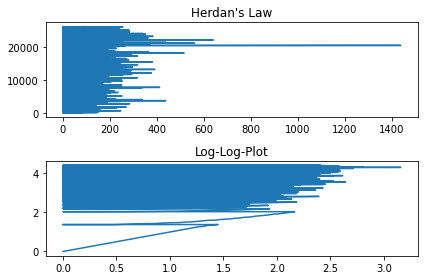

In [15]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(2)
herdans_data.plot(ax=axes[0], title = "Herdan's Law")
log_data.plot(ax=axes[1], title="Log-Log-Plot")
fig.tight_layout()

### Explanation
The code above first loops through each description obtained through show_df.description

Word_tokenize is used to split the sentence into a list of words.

total_words counts the total number of words in all descriptions

total distinct words is the same thing as the size of vocabulary

number of tv shows is equivalent to the number of descriptions

Average words per document is obtained by dividing total words by total number of descriptions

Hit ratio is obtained by dividing total words by vocabulary

The Herdan's Coefficients are calculated the same way as described in the lectures. Although it is the same method, it seems that this particular method for obtaining the coefficients are much less accurate on this dataset compared to the Emma dataset as seen by the graphs above

### 2.2 (1 mark)

Calculate the current ratio of distinct vocabulary items to documents, and compare it
to theoretical prediction from the formula:

$$
    \frac{C}{V} = \frac{k N^{1 - \beta}}{L}
$$

Where

- $C$ is the number of *documents* in the corpus.
- $L$ is the average length of a document in the corpus
- $V$ is the number of distinct vocabulary items
- $N$ the number of words in the corpus
- $k$ and $beta$ are the values you derived in the previous exercise.

In [16]:
C = len(descriptions)
V = total_distinct_words
ratio = C/V
print("Ratio: ", ratio)

N = total_words
L = total_words / len(descriptions)
theoretical_prediction = (k*N**(1-beta))/L
print("Theoretical prediction: ", theoretical_prediction)

Ratio:  0.15227653418608192
Theoretical prediction:  48996830.318207406


### Explanation
The C/V value (left hand side of equation) is calculated. This value is the actual ratio of number of documents to the number of distnct vocabulary items. The `ratio` variable is an accurate ratio.

The right hand side of the equation is used to try to predict this ratio from the obtained lexico statistics. Since these coefficients are extremely inaccurate, the prediction is also very inaccurate

### 2.3 (0.5 marks)

Based on your answer to 2.2, you can reasonably expect that one of the
best ways to improve our classifier will be to add more documents.

If current trends continue, TVmaze will have information for a million
shows in should happen in 2045.

What would you expect for the following:

- $C/V$

- The total vocabulary size (using Herdan's Law)


## Answer

Adding more documents makes our classifier more useful. If it is more useful, the value of C/V increases.
Using Herdan's Law `(V=k*(N**beta))`, as the number of documents increases, the value of N increases. Although 
the calculations for k and beta seem very volatile and inaccurate, I will just assume they remain constant in this example. As a result, V increases in value. However, if C/V is increasing in value, it means that
C increases at a faster rate than V

### 2.4 (0.5 marks)

You will use this answer to tune the classifier in Task 4.

We should exclude happax legomena from the vocabulary, since they cannot be useful to the classifier.

How many words of vocabulary remain?

In [17]:
vocab_dictionary = {}
for description in descriptions:
    description = description.lower()
    words = nltk.word_tokenize(description)
    for word in words:
        if word in vocab_dictionary:
            vocab_dictionary[word] += 1
        else:
            vocab_dictionary[word] = 1
print(vocab_dictionary)

{'<': 12226, 'p': 4479, '>': 12226, 'samuel': 5, 'attempts': 27, 'a': 6614, 'big': 113, ',': 14310, 'romantic': 33, 'gesture': 3, 'at': 946, 'the': 18200, 'airport': 8, 'in': 4999, 'order': 122, 'to': 6434, 'persuade': 4, 'carla': 1, 'not': 394, 'board': 16, 'her': 1332, 'flight': 16, 'london.': 5, '/p': 4474, 'an': 1143, 'example': 5, 'of': 9251, 'best': 174, 'russian': 44, 'animation': 27, 'new': 660, 'wave': 13, '.': 7080, 'project': 40, '``': 596, 'antimult': 1, "''": 607, 'became': 87, 'known': 117, 'first': 389, 'internet': 20, '(': 412, 'www.antimult.ru': 1, ')': 411, 'and': 9470, 'then': 116, 'world': 865, 'anti-cartoons': 1, 'were': 317, 'shown': 14, 'by': 1376, 'ntv': 1, 'channel': 64, 'some': 347, 'european': 25, 'television': 191, 'channels': 1, 'episodes': 95, 'cartoons': 10, 'people': 490, 'appear': 5, 'who': 1482, 'look': 152, 'like': 187, 'bg': 1, 'putin': 1, 'ernst': 4, 'clinton': 5, 'lagutenko': 1, 'zhirinovsky': 1, 'schwarzenegger': 2, 'kramarov': 1, 'kuleshov': 1, '

In [18]:
print("Length of vocab_dictionary: ", len(vocab_dictionary))

Length of vocab_dictionary:  26268


In [19]:
happax_legomena = []
count = 0
for word, count in vocab_dictionary.items():
    if count == 1:
        happax_legomena.append(word)
print("Happax legomena: ", len(happax_legomena))
print("Remaining words: ", len(vocab_dictionary) - len(happax_legomena))

Happax legomena:  13592
Remaining words:  12676


### Explanation
The code above loops through each description and it is split into a list of words. This list is looped through and the code checks if the word exists in the dictionary `vocab_dictionary`. Each word is made a key for this dictionary and if the word is found in the dictionary, the corresponding value is incremented by 1 and if it doesn't exist, a new key is made for `vocab_dictionary` where that word becomes the key.

We see that the size of the dictionary(or vocabulary) is 26268. 

We loop through this dictionary and find the words, i.e., keys. We count the number of words that only appear once or have a count of 1.

There are 12676 remaining words.

### 2.5 (1 mark)

We have mentioned Chollet's heuristic in class:

> It turns out that when approaching a new text-classification task, you should pay close attention to the ratio between the number of samples in your training data and the mean number of words per sample (see figure 11.11). If that ratio is small—less than 1,500—then the bag-of-bigrams model will perform better (and as a bonus, it will be much faster to train and to iterate on too). If that ratio is higher than 1,500, then you should go with a sequence model.

Calculate this ratio.

In [20]:
num_of_samples = 2
out_of_genre_df = show_df.loc[show_df['in_genre'] == 0.0]
out_of_genre_descriptions = out_of_genre_df.description.to_numpy()
in_genre_df = show_df.loc[show_df['in_genre'] == 1.0]
in_genre_descriptions = in_genre_df.description.to_numpy()

In [21]:
total_out_of_genre_words = 0
total_in_genre_words = 0
for description in out_of_genre_descriptions:
    description = description.lower()
    words = nltk.word_tokenize(description)
    total_out_of_genre_words += len(words)
for description in in_genre_descriptions:
    description = description.lower()
    words = nltk.word_tokenize(description)
    total_in_genre_words += len(words)

In [22]:
print("total_out_of_genre_words: ", total_out_of_genre_words)
print("total_in_genre_words: ", total_in_genre_words)
print("average number of words per sample: ", (total_out_of_genre_words + total_in_genre_words)/2)

total_out_of_genre_words:  157859
total_in_genre_words:  163048
average number of words per sample:  160453.5


### Explanation
I assume there are 2 samples, in_genre and out_of_genre samples for show_df.

The descriptions for each of these samples are looped through and split these descriptions to get a list of words. The total sum of all these words is calculated for each sample.

Finally, the average number words per sample is calculated.

## Task 3 (5 marks) - Information retrieval

In this task you are going to create a naive search engine that will let you find a "similar"
TV show.

Here is a randomly-selected show for you to use in this section. You will also use the data
in `show_df`.

In [23]:
selected_show = show_df[show_df.in_genre == 1.0].sample(n=1, random_state=random_state_key)
selected_show.T

,2132
tvmaze_id,54472
showname,The Buildings That Fought Hitler
description,<p>Rob Bell presents an eight-part series on t...
in_genre,1


In [24]:
selected_show.iloc[0].description

'<p>Rob Bell presents an eight-part series on the defences that Britain put in place in 1940 to defend the country against the very real threat of a Nazi invasion. Over 6,000 structures were built, repurposed or requisitioned. This series looks at just some of the buildings that were designed to fight Hitler.</p>'

### 3.1 (2 marks)

Vectorise the `description` of each show using TFIDF. 

- Vectorise words and bigrams

- Only include words and bigrams that appear twice

- Only include words and bigrams that appear in less than 50% of the descriptions

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words = 'english', ngram_range = (1,2), min_df = int(2), max_df = float(0.5))
description_as_vectors = tfidf.fit_transform(out_of_genre_descriptions)
print(type(description_as_vectors))

<class 'scipy.sparse._csr.csr_matrix'>


### Explanation
The code above creates a tfidf vectorizer. The vectorizer removes english stop words, only include words and bigrams (ngram_range), only include word and bigrams that appear at least twice (min_df=int(2)) and only include word and bigrams that are used in less than 50% descriptions (max_df = float(0.5))

fit_transform is used to takes the descriptions from out_of_genre_descriptions and converts them to a bag of array vector space model. Each description is converted to an array of vectors.

### 3.2 (1 mark)

Write code that shows the size of this new vocabulary (the total number of words and bigrams).

In [26]:
print(description_as_vectors.shape)
print(tfidf.get_feature_names()[500:510])

(2000, 8965)
['announces', 'annual', 'annually', 'anonymity', 'answer', 'answer questions', 'answered', 'answering', 'answers', 'answers questions']


### Explanation
The size of the new vocabulary is 2000 rows by 8965 columns. 2000 descriptions with 8965 words and bigrams

### 3.3 (2 marks)

Iterate over the shows that don't have your genre to find the show whose description is most
similar (using cosine similarity) to the show that was chosen for you.

That is, you should end up with a show that:

- Has a very similar description to the show described at the start of Task 3

- Belongs to a diffferent genre.



In [27]:
selected_show_description = selected_show.description.to_numpy()
selected_show_description_list = selected_show_description.tolist()  #Need because using transform on numpy array results in error "'numpy.ndarray' object has no attribute 'lower'"
#it is necessary to remove '<' and '>' before transforming so there are no errors
#below are 2 ways, one of them removes p as well from '<p>' whilst the other only removes the '<' and '>'

#selected_show_description_list = selected_show_description_list[0][3:]
#selected_show_description_list = selected_show_description_list[:-4]
selected_show_description_list = selected_show_description_list[0].replace('<', '')
selected_show_description_list = selected_show_description_list.replace('>', '')
selected_show_description_list

'pRob Bell presents an eight-part series on the defences that Britain put in place in 1940 to defend the country against the very real threat of a Nazi invasion. Over 6,000 structures were built, repurposed or requisitioned. This series looks at just some of the buildings that were designed to fight Hitler./p'

In [28]:
from sklearn.metrics.pairwise import cosine_similarity
query_as_vector = tfidf.transform([selected_show_description_list])
similarities = cosine_similarity(description_as_vectors, query_as_vector)
ranked_results = np.argsort(similarities, axis = 0)[::-1]
for result_position in ranked_results[:1]:
    sentence_number = result_position[0]
    scoring = similarities[sentence_number]
    sentence = descriptions[sentence_number]
print(sentence_number)
print(scoring)
print(sentence)

390
[0.22113712]
<p><b>Hitler's Gold</b> explores the covert financial web spun by the Nazi's.</p>


In [29]:
selected_show_description_list

'pRob Bell presents an eight-part series on the defences that Britain put in place in 1940 to defend the country against the very real threat of a Nazi invasion. Over 6,000 structures were built, repurposed or requisitioned. This series looks at just some of the buildings that were designed to fight Hitler./p'

### Explanation
In the selected_show.description, it has the special characters `<` and `>`. These special characters are first removed so they can be transformed with tfidf. If we decide to remove `p` as well from the sentence (results in removing `<p>` from the sentence), it produces a different result to leaving `p` in the sentence before transforming. The code for this is commented out  to make it optional to leave `p` out of the description.

`similarities` are calculated using cosine_similarity. It receives out_of_genre descriptions and the selected show descriptions which are both transformed into vectors. For every row of descriptions there is now a scalar value which represents how similar each out_of_genre description is to the selected show description. `ranked_results` will sort the similarities in descending order. We get the first ranked result, which is also the most similar description to the selected show. We retrieve the sentence_number, similarity score and the sentence itself.

The selected show and out_of_genre show descriptions are printed above to compare.

## Task 4 (10 marks) - detect genres

In this task, we'll be building a naively simple model for identifying TV genres.

### 4.1 (1 mark)

Use an sklearn function to break your dataset into a training set, and a test set. 

Set the random number initializer to your 
`random_state_key` so that this notebook always returns the same results.

In [30]:
from sklearn.model_selection import train_test_split
tv, test_data = train_test_split(show_df, random_state = random_state_key)
train_data, validation_data = train_test_split(tv, test_size = 0.1, random_state = random_state_key)

In [31]:
train_data

,tvmaze_id,showname,description,in_genre
592,18415,Charles II: The Power and the Passion,<p>Rufus Sewell stars in a four-part dramatisa...,1.0
1632,42103,Listening Snow Tower,<p>A story that follows the master of Listenin...,1.0
36871,45496,Chapelwaite,<p><b>Chapelwaite</b> follows Captain Charles ...,0.0
2462,64887,Heroes of War: Poland,<p>2014 marks the 75th anniversary of the begi...,1.0
53887,67873,Ming Jun Qu Qi,"<p>Rejected by all, the naive witch falls in l...",0.0
...,...,...,...,...
6077,6887,Restoring Britain's Landmarks,<p>The six-part series follows the Landmark Tr...,0.0
20607,24987,Rick Stein's Food Heroes,<p>Having based his own reputation of a passio...,0.0
31633,38817,Snake Man of Appalachia,<p>Follow the lives of an extraordinary Appala...,0.0
2354,62496,Back in Time for Birmingham,<p>The latest iteration of this hit series see...,1.0


### Explanation
The whole data set is split into train, test and validation. 

### 4.2 (1 mark)

Create a vectorizer for your data, and prepare it on the descriptions in the training data. 

Set `max_tokens` to the value in your answer from 2.4 (plus 1 for the "unknown" token).

(The vectorizer you used in section 3.1 was trained on all data, not just your training data,
so cannot be re-used here without leaking test information into the training data.)

It should use TFIDF weighting. 

In [32]:
import tensorflow as tf

In [33]:
#had trouble with my juypter notebook running older tensorflow version. Kept getting error when using TextVectorization 
#had to use text vectorization this way. Can remove ".experimental.preprocessing" if not using older tensorflow version
#also use "tf_idf" instead of "tf-idf" if not using experimental textvectorization
vectorizer = tf.keras.layers.TextVectorization(output_mode = 'tf-idf', max_tokens = len(vocab_dictionary) - len(happax_legomena) + 1)
vectorizer.adapt(train_data.description.to_numpy())

### Explanation
The code above creates a tfidf vectorizer. max_tokens is used to ignore all words that appear in only 1 document.

vectorizer.adapt is the equivalent of fitting or calculating the required parameters.

I used `tf.keras.layers.experimental.preprocessing.TextVectorization`. This was possibly due to me having issues with upgrading my tensorflow version. I assume `tf.keras.layers.TextVectorization` should work fine.

### 4.3 (1 mark)

Use the vectorizer to transform the training and test data

In [34]:
train_vectors = vectorizer(train_data.description)
validation_vector = vectorizer(validation_data.description)
test_vectors = vectorizer(test_data.description)

In [35]:
train_vectors

<tf.Tensor: shape=(2700, 12677), dtype=float32, numpy=
array([[ 12.772459 ,   1.5173154,   0.       , ...,   0.       ,
          0.       ,   0.       ],
       [  0.       ,   2.275973 ,   1.637974 , ...,   0.       ,
          0.       ,   0.       ],
       [ 25.544918 ,   3.0346308,   0.818987 , ...,   0.       ,
          0.       ,   0.       ],
       ...,
       [ 19.158688 ,   1.5173154,   1.637974 , ...,   0.       ,
          0.       ,   0.       ],
       [ 25.544918 ,   2.275973 ,   1.637974 , ...,   0.       ,
          0.       ,   0.       ],
       [108.5659   ,   6.0692616,   4.094935 , ...,   0.       ,
          0.       ,   0.       ]], dtype=float32)>

In [36]:
test_vectors

<tf.Tensor: shape=(1000, 12677), dtype=float32, numpy=
array([[19.158688 ,  2.275973 ,  1.637974 , ...,  0.       ,  0.       ,
         0.       ],
       [51.089836 ,  6.827919 ,  1.637974 , ...,  0.       ,  0.       ,
         0.       ],
       [ 6.3862295,  0.       ,  1.637974 , ...,  0.       ,  0.       ,
         0.       ],
       ...,
       [51.089836 ,  3.7932885,  0.       , ...,  0.       ,  0.       ,
         0.       ],
       [25.544918 ,  2.275973 ,  0.818987 , ...,  0.       ,  0.       ,
         0.       ],
       [ 6.3862295,  0.7586577,  0.818987 , ...,  0.       ,  0.       ,
         0.       ]], dtype=float32)>

### Explanation
From the code above, we can see that the train, test and validation is transformed into an array of vectors

### 4.4 (2 marks)

We are creating a logistic regression model using Keras, which we will use
to predict the genre of a TV show based on its description.

Create a model based on the following:

- An input layer with a shape based on the size of the vocabulary from your vectorization.

- An output layer that uses a sigmoid activation function.

Compile your model (choose an appropriate loss, and add 'accuracy' as a metric) and display a summary of it.

In [37]:
from tensorflow import keras
inputs = keras.Input(shape = (train_vectors.shape[1],))
output = keras.layers.Dense(1, activation = "sigmoid")(inputs)
model = keras.Model(inputs = [inputs], outputs = [output])

model.compile(loss = 'binary_crossentropy', metrics = ["accuracy"])

In [38]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 12677)]           0         
                                                                 
 dense (Dense)               (None, 1)                 12678     
                                                                 
Total params: 12,678
Trainable params: 12,678
Non-trainable params: 0
_________________________________________________________________


### Explanation
The input layer takes a shape of `train_vectors.shape[1]` which is equivalent to the size of distinct vocabulary words excluding words that appear in only 1 document / description. The code is written as lazily, meaning that the layers don't process data until it is actually needed or available.

### 4.5 (1 mark)

Fit the model to the training data. The target variable is `in_genre`.
Hold out 10% of the data as validation data. Stop when the loss in the 
validation data stops improving.

In [39]:
history = model.fit(x = train_vectors, y = train_data.in_genre, 
                    validation_data = (validation_vector, validation_data.in_genre),
                    callbacks = [keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 3)], epochs = 20)

Epoch 1/20
85/85 [==============================] - 2s 10ms/step - loss: 0.5810 - accuracy: 0.7230 - val_loss: 0.4895 - val_accuracy: 0.7900
Epoch 2/20
85/85 [==============================] - 0s 5ms/step - loss: 0.3808 - accuracy: 0.8819 - val_loss: 0.4351 - val_accuracy: 0.8000
Epoch 3/20
85/85 [==============================] - 0s 5ms/step - loss: 0.2895 - accuracy: 0.9159 - val_loss: 0.4025 - val_accuracy: 0.8233
Epoch 4/20
85/85 [==============================] - 0s 5ms/step - loss: 0.2334 - accuracy: 0.9393 - val_loss: 0.4219 - val_accuracy: 0.8033
Epoch 5/20
85/85 [==============================] - 0s 5ms/step - loss: 0.1936 - accuracy: 0.9504 - val_loss: 0.3946 - val_accuracy: 0.8133
Epoch 6/20
85/85 [==============================] - 0s 5ms/step - loss: 0.1643 - accuracy: 0.9585 - val_loss: 0.4037 - val_accuracy: 0.8133
Epoch 7/20
85/85 [==============================] - 0s 6ms/step - loss: 0.1416 - accuracy: 0.9652 - val_loss: 0.4123 - val_accuracy: 0.8067
Epoch 8/20
85/85 [=

### Explanation
Model is fitted with `train_vectors` and `train_data.in_genre` for training. `validation_data` is used to check how well the trained model works on newer data. `callbacks` is used to stop training the model early if the validation loss decreases in performance 3 times in a row. The model is trained a total of 20 times

The model is attempting to predict if a TV show is in_genre or not(if its genre is history or not), if given a new description.

### 4.6 (1 mark)

Plot the training and validation loss and accuracy and confirm whether your model has begun to overfit.

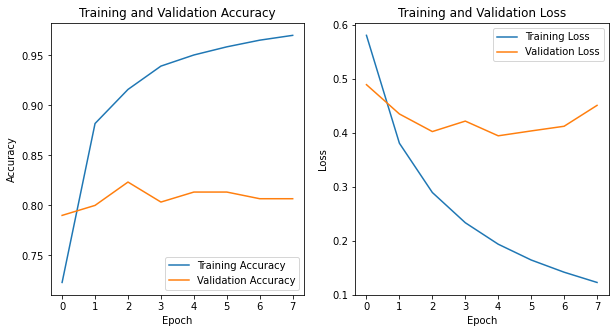

In [40]:
fig, axes = plt.subplots(1, 2, figsize = (10,5))
axes[0].plot(history.history['accuracy'], label = 'Training Accuracy')
axes[0].plot(history.history['val_accuracy'], label = 'Validation Accuracy')
axes[0].set_title('Training and Validation Accuracy')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')
axes[0].legend()

axes[1].plot(history.history['loss'], label = 'Training Loss')
axes[1].plot(history.history['val_loss'], label = 'Validation Loss')
axes[1].set_title('Training and Validation Loss')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].legend()

### Explanation
The model does begin to overfit after two epochs. The training accuracy continues to improve while the validation accuracy doesn't improve anymore.

### 4.7 (1 mark)

Report the accuracy of your model on the training data. It should be quite close to the
validation accuracy.

In [41]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [42]:
print(history.history['val_accuracy'])

[0.7900000214576721, 0.800000011920929, 0.8233333230018616, 0.8033333420753479, 0.8133333325386047, 0.8133333325386047, 0.8066666722297668, 0.8066666722297668]


In [43]:
print(history.history['accuracy'])

[0.7229629755020142, 0.881851851940155, 0.915925920009613, 0.9392592310905457, 0.9503703713417053, 0.9585185050964355, 0.9651851654052734, 0.9700000286102295]


In [44]:
print("Validation final accuracy: ", history.history['val_accuracy'][-1])

Validation final accuracy:  0.8066666722297668


In [45]:
print("Training final accuracy: ", history.history['accuracy'][-1])

Training final accuracy:  0.9700000286102295


### Explanation
The outputs above should that on the training data, the accuracy got better for each epoch but it remained almost the same for the validation data. This is a sign of overfitting.

### 4.8 (1 mark)

Extract the weights from the logistic regression layer, and match them up with the words in the
vocabulary.

Identify any vocabulary that is strongly associated with being in-genre or with being out-of-genre.

In [46]:
vocab = vectorizer.get_vocabulary()
weights = model.get_weights()[0][:,0]
vocab_weights_df = pd.Series(index=vocab, data=weights)
print(vocab_weights_df.sort_values())

kids          -0.199915
teacher       -0.167446
police        -0.160863
ultimate      -0.156498
daily         -0.155563
                 ...   
historical     0.217293
documentary    0.218968
historyp       0.242308
joseon         0.249589
period         0.249885
Length: 12677, dtype: float32


### Explanation
The code above will display the vocabulary and the corresponding weighting or impact it had in the decisions made by the model. The more positively weighted words appear in a description, the more likely it is to be in_genre. For example, the more times `historical` appears in a description, the more likely the tv show is to be in_genre or to be about history since `historical` is a positively weighted word. 

If the word is negatively weighted, the likely it is to be out_of_genre. The closer the weights are to 0, the more likely the words have no impact in predicting genre.

### 4.9 (1 mark)

Create a description of a new show to pitch to someone at Macquarie's Film and Television School that is going to be strongly associated with your genre. If you are lacking inspiration, this is the kind of task that 
large language models do quite well.

Confirm that your model does correctly predict the genre.

In [47]:
new_show_description = ["'Echoes of the Past: Unveiling Forgotten Tales' is a captivating documentary series that uncovers hidden stories from history. Hosted by historian Dr. Elizabeth Reynolds, each episode explores extraordinary individuals, events, and cultures that have shaped our world. With immersive visuals and expert insights, the show transports viewers to ancient civilizations, pivotal moments, and unexplored wonders, revealing forgotten narratives with passion and precision. 'Echoes of the Past' invites audiences to rediscover the hidden threads that connect us to our past."]
new_show_description_vector = vectorizer(new_show_description)
new_show_description_ingenre = np.array([1.0])
print(model.evaluate(new_show_description_vector, new_show_description_ingenre))

1/1 [==============================] - 1s 760ms/step - loss: 3.7474e-04 - accuracy: 1.0000
[0.0003747449954971671, 1.0]


In [48]:
print("new_show_description_vector shape: ", new_show_description_vector.shape)
print("new_show_description_ingenre shape: ", new_show_description_ingenre.shape)

new_show_description_vector shape:  (1, 12677)
new_show_description_ingenre shape:  (1,)


### Explanation
For this question, I used ChatGPT and asked "can you write a short description of a new show related to history". This produced the description for this task to use to test the model on new data.

The description is vectorized. An in_genre Numpy array is created and has the value `[1.0]` to indicate that the tv show with this new description is about history. The shapes printed above show the format needed before passing the data into the model 

## Task 5 (2 marks) - embeddings

### Task 5.1 (2 marks)

Create a new model with an embedding layer, compile it, fit it and evaluate its performance on the training data
set.

Don't worry if it doesn't improve the model performance --- based on 
your answers to 2.3 we would expect an embedding layer to make it much worse, and based on 2.5 we would
expect a sequence-to-sequence model to perform poorly as well!

In [49]:
def euclidean_distance(tensor):
    x1, y1, x2, y2 = tensor[:, 0], tensor[:, 1], tensor[:, 2], tensor[:, 3]
    distance = (x1-x2)**2 + (y1-y2)**2
    return tf.expand_dims(distance, axis=-1)

inputs = keras.Input(shape = (train_vectors.shape[1],))
embedding_layer = keras.layers.Embedding(input_dim = train_vectors.shape[1], output_dim = 2, input_length = 1)(inputs)
flattening_layer = keras.layers.Flatten()(embedding_layer)
distance_layer = keras.layers.Lambda(euclidean_distance)(flattening_layer)
output = keras.layers.Dense(1, activation = "sigmoid")(distance_layer)
model = keras.Model(inputs = [inputs], outputs = [output])

model.compile(loss = 'binary_crossentropy', metrics = ["accuracy"])

In [50]:
history = model.fit(x = train_vectors, y = train_data.in_genre, 
                    validation_data = (validation_vector, validation_data.in_genre),
                    callbacks = [keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 3)], epochs = 20)

Epoch 1/20
85/85 [==============================] - 5s 43ms/step - loss: 0.6928 - accuracy: 0.5074 - val_loss: 0.6923 - val_accuracy: 0.5100
Epoch 2/20
85/85 [==============================] - 3s 39ms/step - loss: 0.6914 - accuracy: 0.5133 - val_loss: 0.6907 - val_accuracy: 0.5267
Epoch 3/20
85/85 [==============================] - 4s 41ms/step - loss: 0.6891 - accuracy: 0.5604 - val_loss: 0.6883 - val_accuracy: 0.5400
Epoch 4/20
85/85 [==============================] - 3s 41ms/step - loss: 0.6860 - accuracy: 0.5741 - val_loss: 0.6857 - val_accuracy: 0.5267
Epoch 5/20
85/85 [==============================] - 3s 39ms/step - loss: 0.6826 - accuracy: 0.5804 - val_loss: 0.6832 - val_accuracy: 0.5267
Epoch 6/20
85/85 [==============================] - 3s 40ms/step - loss: 0.6793 - accuracy: 0.5737 - val_loss: 0.6811 - val_accuracy: 0.5300
Epoch 7/20
85/85 [==============================] - 3s 39ms/step - loss: 0.6763 - accuracy: 0.5867 - val_loss: 0.6794 - val_accuracy: 0.5367
Epoch 8/20
85

# Submission

Your submission should consist of this Jupyter notebook with all your code and explanations inserted into the notebook as text cells. **The notebook should contain the output of the runs. All code should run. Code with syntax errors or code without output will not be assessed.**

**Do not submit multiple files. If you feel you need to submit multiple files, please contact greg.baker@mq.edu.au first.**

Examine the text cells of this notebook so that you can have an idea of how to format text for good visual impact. You can also read this useful [guide to the MarkDown notation](https://daringfireball.net/projects/markdown/syntax), which explains the format of the text cells.

Each task specifies a number of marks. The final mark of the assignment is the sum of all the marks of each individual task.

By submitting this assignment you are acknowledging that this is your own work. Any submissions that break the code of academic honesty will be penalised as per [the academic integrity policy](https://policies.mq.edu.au/document/view.php?id=3).

## A note on the use of AI code generators

We view AI code generators such as copilot, CodeGPT, etc as tools that can help you write code quickly. You are allowed to use these tools. If you choose to use them, make the following explicit:
- What part of your code is based on the output of such tools, 
- What tools you used,
- What prompts you used to generate the code, and
- What modifications you made on the generated code.

This will help us assess your work fairly.